In [1]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import os
from numba_stats import expon # crystalball,crystalball_ex, norm, expon, voigt, truncexpon

os.environ["HOMELUDO"] = '/home/submit/mori25/'
os.environ["DPUSER"] = '/work/submit/mori25/Darkphotons_ludo/offline_analysis'

from training_offline import Trainer, plot_ROC,plot_ROC_train_test 

Start by looking at the performance of a few differend BDTs on Y data. First evaluate them on the Y data and then plot the ROC. 




Start loading data


Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/offline/Y/merged_A.root to memory
Start loading MC data
Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/MC_InclusiveMinBias/Y/mergedY1_A.root to memory
sig_lims: [[9.41 9.51]]
Threw 0.29408608598498953 of signal events
Defined training and evaluation datasets
loading model  /work/submit/mori25/Darkphotons_ludo/offline_analysis/BDT/trained_models/forest_standard_Y1.json
loading successful


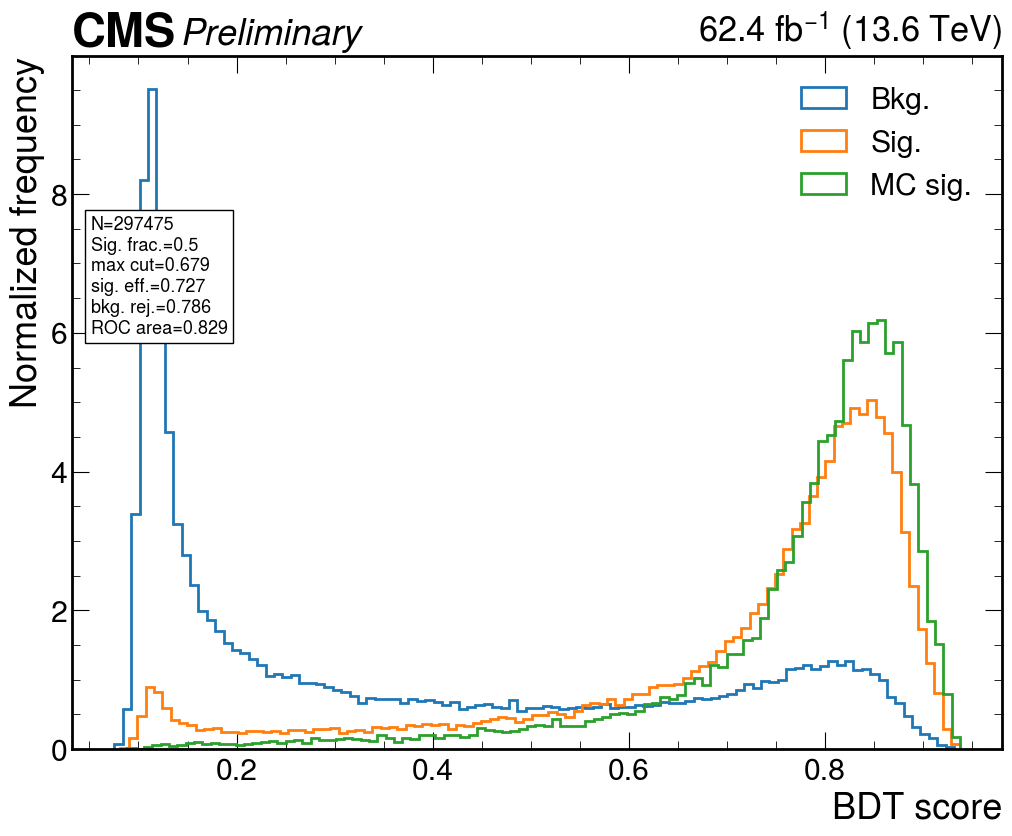

In [2]:
Y_forest = Trainer("Y", 'forest_standard')
Y_forest.complete_load(name_extra='1',include_MC=True, trigger = "HLT_Dimuon10_Upsilon_y1p4", signal_indices=[1])
Y_forest.plot_model(plot_training=False,plot_MC=True)


Comparison between Y 1-2-3-123, and ROCs




Start loading data


Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/offline/Y/merged_A.root to memory
Start loading MC data
Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/MC_InclusiveMinBias/Y/mergedY1_A.root to memory
sig_lims: [[9.41 9.51]]
Threw 0.29408608598498953 of signal events
Defined training and evaluation datasets
loading model  /work/submit/mori25/Darkphotons_ludo/offline_analysis/BDT/trained_models/forest_standard_Y1.json
loading successful



Start loading data
Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/offline/Y/merged_A.root to memory
Start loading MC data
Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/MC_InclusiveMinBias/Y/mergedY2_A.root to memory
sig_lims: [[ 9.97 10.07]]
Threw 0.43122781289959133 of bkg events
Defined training and evaluation datasets
loading model  /work/submit/mori25/Darkphotons_ludo/offline_analysis/BDT/trained_models/forest_s

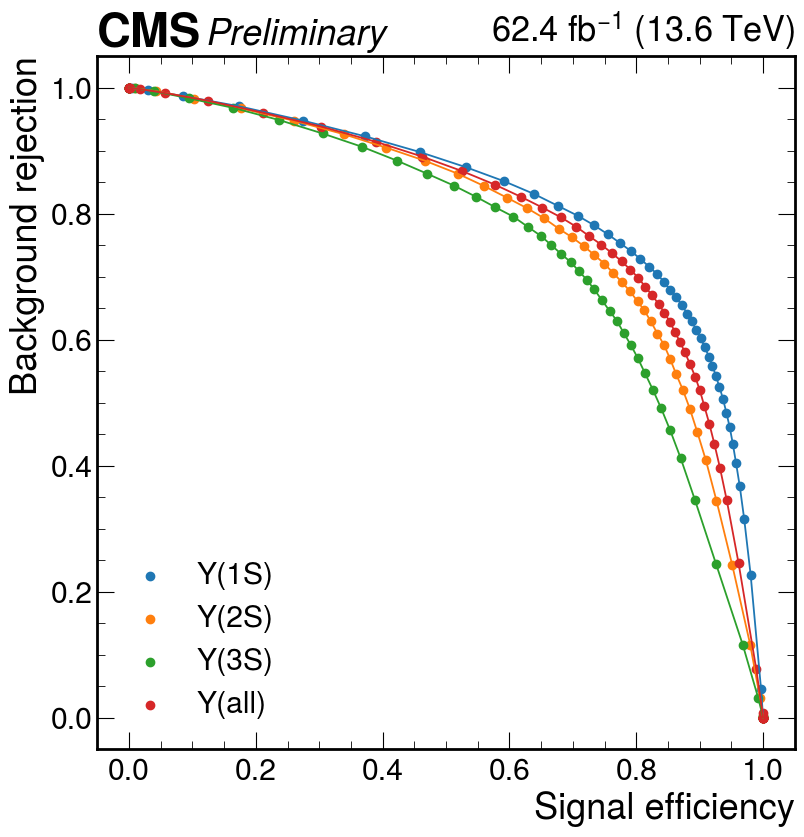

In [3]:
Y1_forest = Trainer("Y", 'forest_standard')
Y1_forest.complete_load(name_extra='1', include_MC=True,trigger = "HLT_Dimuon10_Upsilon_y1p4", signal_indices=[1])
Y2_forest = Trainer("Y", 'forest_standard')
Y2_forest.complete_load(name_extra='2', include_MC=True,trigger = "HLT_Dimuon10_Upsilon_y1p4", signal_indices=[2])
Y3_forest = Trainer("Y", 'forest_standard')
Y3_forest.complete_load(name_extra='3', include_MC=True,trigger = "HLT_Dimuon10_Upsilon_y1p4", signal_indices=[3])
Y123_forest = Trainer("Y", 'forest_standard')
Y123_forest.complete_load(name_extra='123', include_MC=True,trigger = "HLT_Dimuon10_Upsilon_y1p4", signal_indices=[1,2,3])

plot_ROC([Y1_forest,Y2_forest,Y3_forest,Y123_forest], 
         ["Y(1S)", "Y(2S)","Y(3S)", "Y(all)"],
         [Y1_forest.dval,Y2_forest.dval,Y3_forest.dval,Y123_forest.dval],n_points=50)




Start loading data


Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/offline/Y/merged_A.root to memory
Start loading MC data
Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/MC_InclusiveMinBias/Y/mergedY1_A.root to memory
sig_lims: [[9.41 9.51]]
Threw 0.29408608598498953 of signal events
Defined training and evaluation datasets
loading model  /work/submit/mori25/Darkphotons_ludo/offline_analysis/BDT/trained_models/tree_standard_Y1.json
loading successful


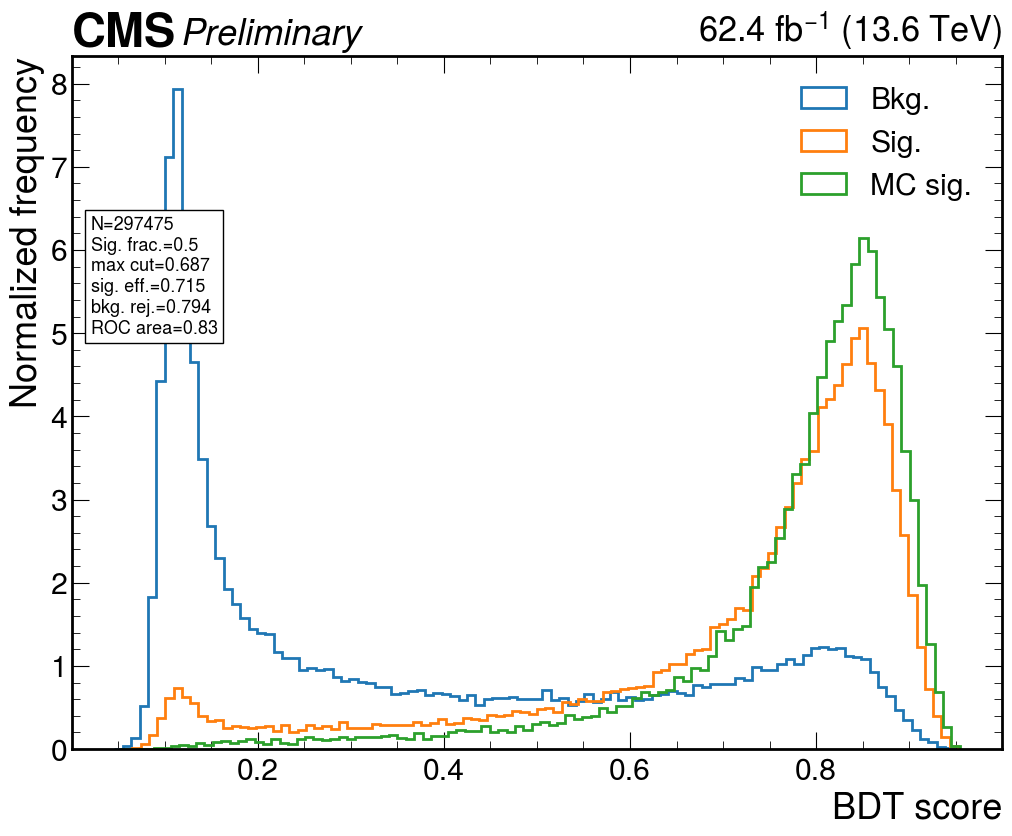

In [4]:
Y_tree = Trainer("Y", 'tree_standard')
Y_tree.complete_load(name_extra='1',include_MC=True,trigger = "HLT_Dimuon10_Upsilon_y1p4",signal_indices=[1])
Y_tree.plot_model(plot_training=False,plot_MC=True)

In the next one we include the MuonID in the training sample. No significant improvements are noticeable in the ROCs. 




Start loading data


Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/offline/Y/merged_A.root to memory
Start loading MC data
Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/MC_InclusiveMinBias/Y/mergedY1_A.root to memory
sig_lims: [[9.41 9.51]]
Threw 0.29408608598498953 of signal events
Defined training and evaluation datasets
loading model  /work/submit/mori25/Darkphotons_ludo/offline_analysis/BDT/trained_models/forest_ID_Y.json
loading successful


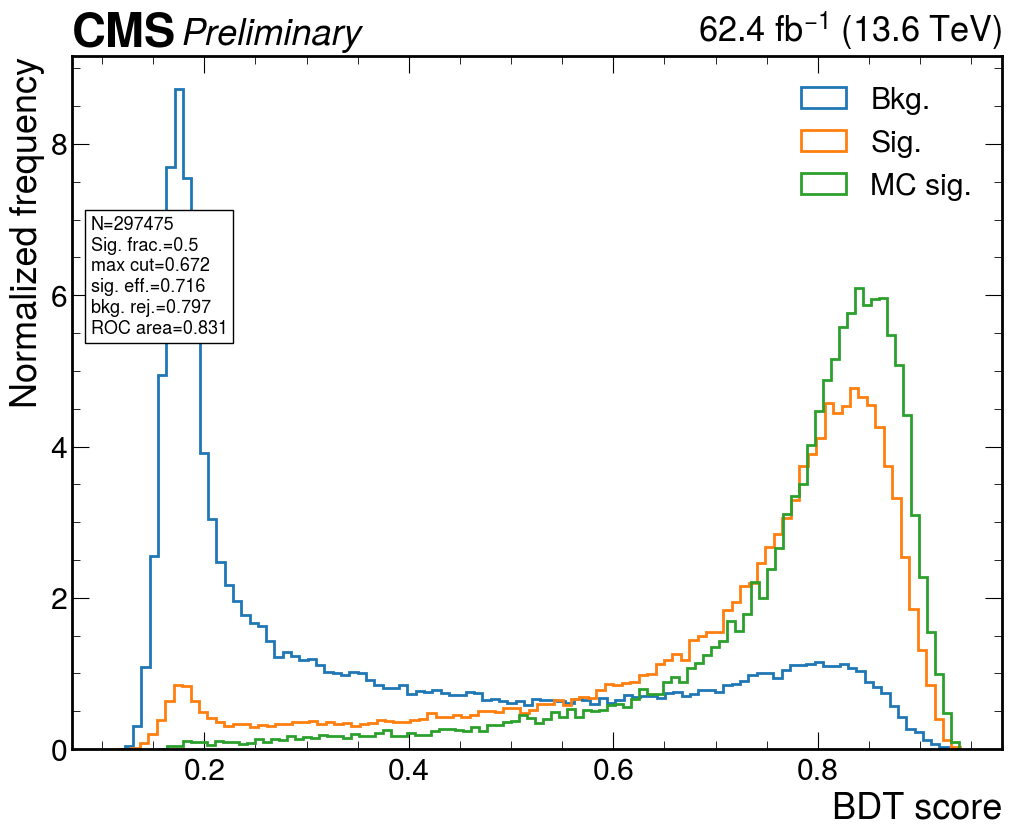

In [5]:
Y_forest_ID = Trainer("Y", 'forest_ID')
Y_forest_ID.complete_load(include_MC=True,trigger = "HLT_Dimuon10_Upsilon_y1p4",signal_indices=[1])
Y_forest_ID.plot_model(plot_MC=True)




Start loading data


Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/offline/Y/merged_A.root to memory
Start loading MC data
Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/MC_InclusiveMinBias/Y/mergedY1_A.root to memory
sig_lims: [[9.41 9.51]]
Threw 0.29408608598498953 of signal events
Defined training and evaluation datasets
loading model  /work/submit/mori25/Darkphotons_ludo/offline_analysis/BDT/trained_models/forest_standard_Jpsi.json
loading successful


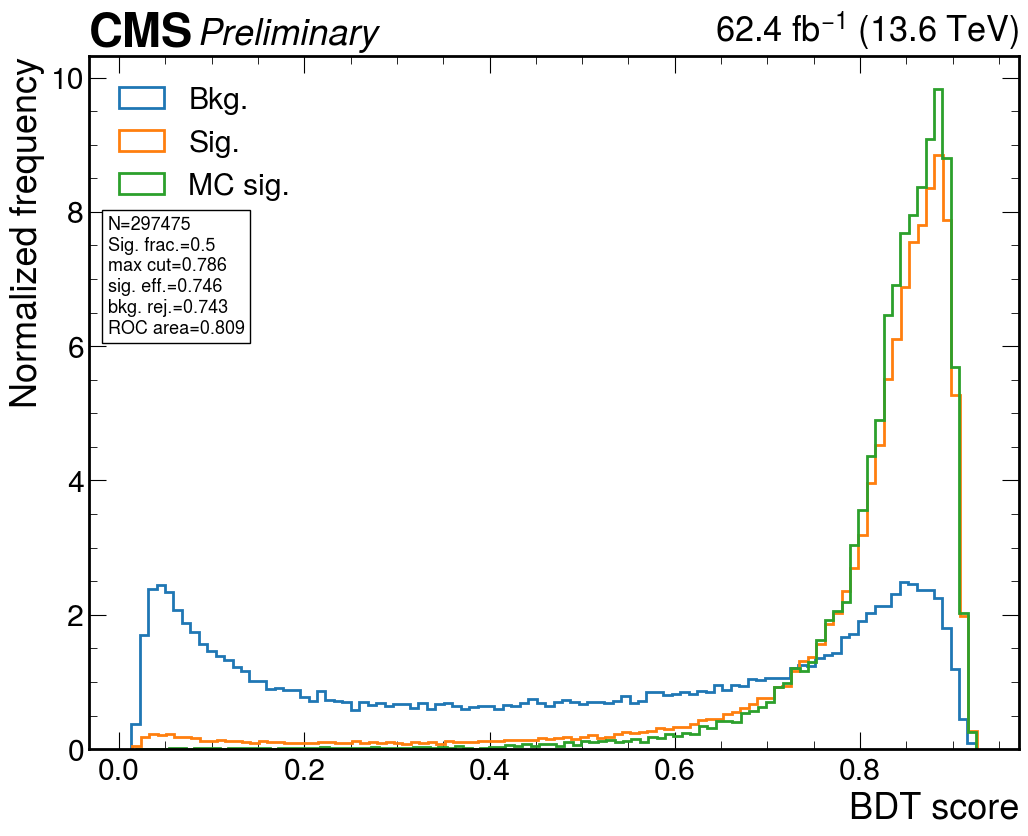

In [6]:
Jpsi_forest_on_Y = Trainer("Jpsi", 'forest_standard') #Trainer object accessing model trained on Jpsi data
Jpsi_forest_on_Y.complete_load("Y",include_MC=True,trigger = "HLT_Dimuon10_Upsilon_y1p4",signal_indices=[1]) #Load Y data for evaluation
Jpsi_forest_on_Y.plot_model(plot_MC=True)
# Jpsi_forest_on_Y.plot_mass(plot_MC=True, apply_weights=False)




Start loading data


Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/offline/Y/merged_A.root to memory
Start loading MC data
Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/MC_InclusiveMinBias/Y/mergedY1_A.root to memory
sig_lims: [[9.41 9.51]]
Threw 0.29408608598498953 of signal events
Defined training and evaluation datasets
loading model  /work/submit/mori25/Darkphotons_ludo/offline_analysis/BDT/trained_models/forest_prompt_Jpsi.json
loading successful


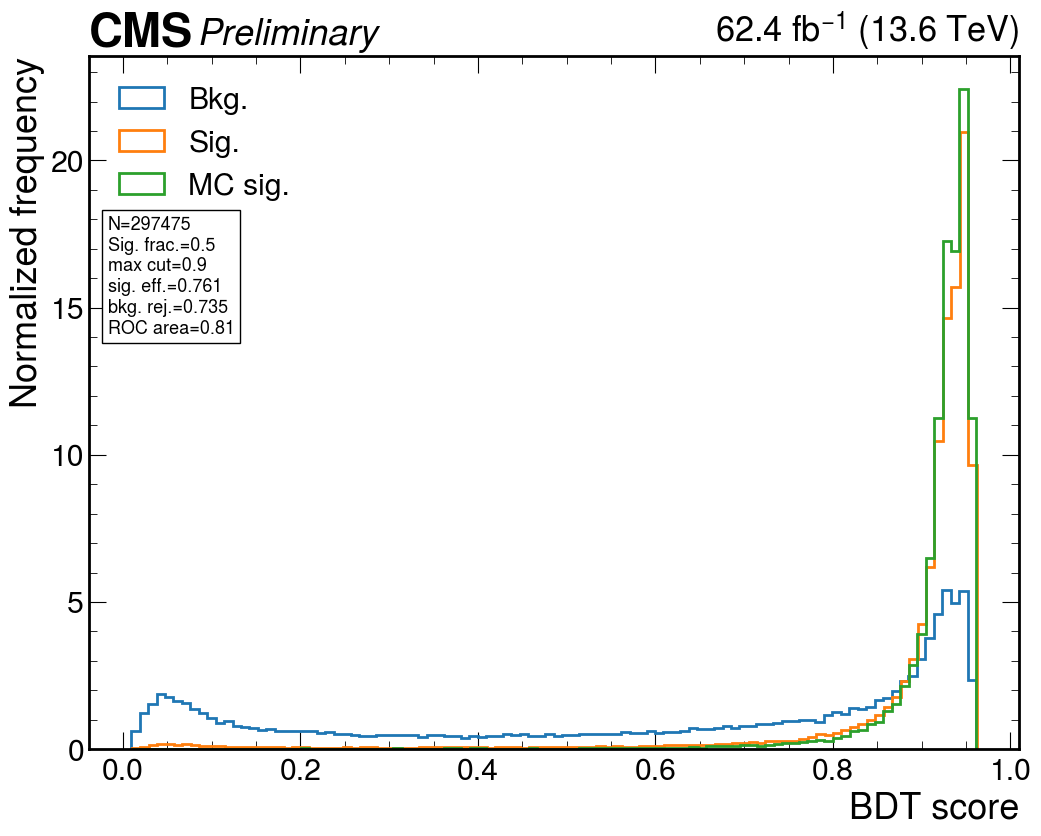

In [7]:
Jpsi_forest_on_Y_prompt = Trainer("Jpsi", 'forest_prompt') #Trainer object accessing model trained on Jpsi
Jpsi_forest_on_Y_prompt.complete_load("Y", include_MC=True,trigger = "HLT_Dimuon10_Upsilon_y1p4",signal_indices=[1]) #Load Y data for evaluation
Jpsi_forest_on_Y_prompt.plot_model(plot_MC=True)

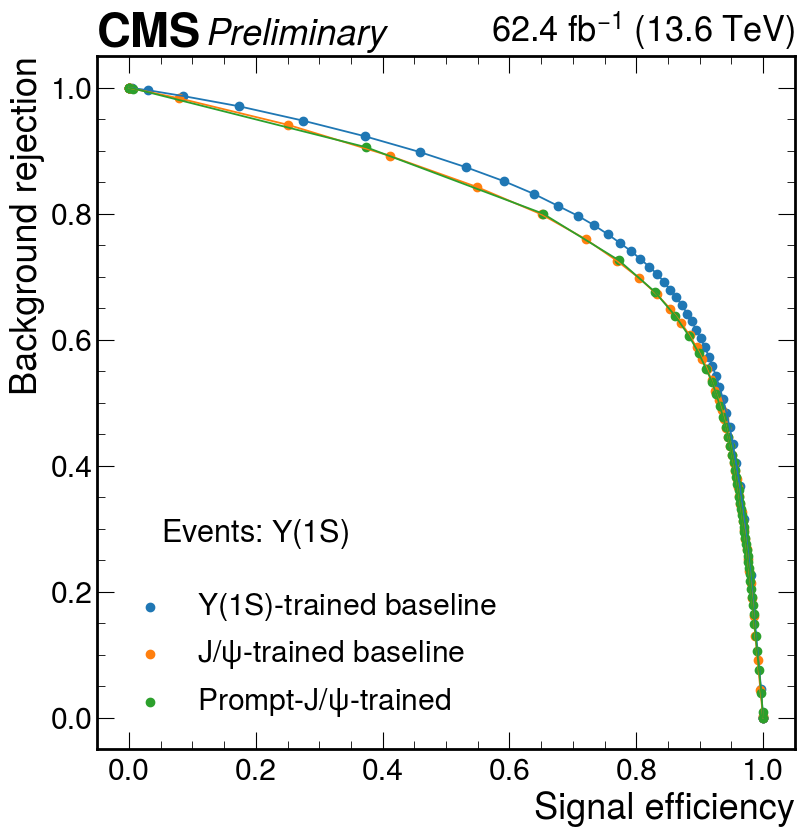

In [14]:
# plot_ROC_train_test([Y_forest,Y_forest_ID], ["Boosted RF", "Boosted RF w/ ID"], n_points=20)
# plot_ROC([Y_forest,Y_forest_ID,Jpsi_forest_on_Y,Jpsi_forest_on_Y_prompt], 
#          [r"$\Upsilon(1S)$-trained baseline", r"$\Upsilon$(1S)-trained w/ softMVA", r"$J/\psi$-trained baseline", r"Prompt-$J/\psi$-trained"],
#          [Y_forest.dval,Y_forest_ID.dval,Jpsi_forest_on_Y.dval,Jpsi_forest_on_Y_prompt.dval],n_points=50)
plot_ROC([Y_forest,Jpsi_forest_on_Y,Jpsi_forest_on_Y_prompt], 
         [r"$\Upsilon(1S)$-trained baseline",  r"$J/\psi$-trained baseline", r"Prompt-$J/\psi$-trained"],
         [Y_forest.dval,Jpsi_forest_on_Y.dval,Jpsi_forest_on_Y_prompt.dval],n_points=50,text=r"Events: $\Upsilon(1S)$",textpos=(0.091,0.3),textsize=22)

From now on, consider the networks operating on the Jpsi data.

Now consider a special case: the Y-trained random forest evaluated on the Jpsi meson data. After computing the sPlots and unfolding signal and background, we will be able to apply corrections "ex post". However, here, we can still apply corrections based on the tail fit in the l_{xy} distribution, and define signal and background through the same cuts as in training (to be found in the config). We see how the prompt reweighing improves greatly the outcome.




Start loading data


Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/offline/Jpsi/merged_A.root to memory
Start loading MC data
Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/MC_InclusiveMinBias/Jpsi/merged_A.root to memory
sig_lims: [[3.0886, 3.0986]]
Threw 0.012527441541962902 of bkg events
Defined training and evaluation datasets
loading model  /work/submit/mori25/Darkphotons_ludo/offline_analysis/BDT/trained_models/forest_standard_Y.json
loading successful


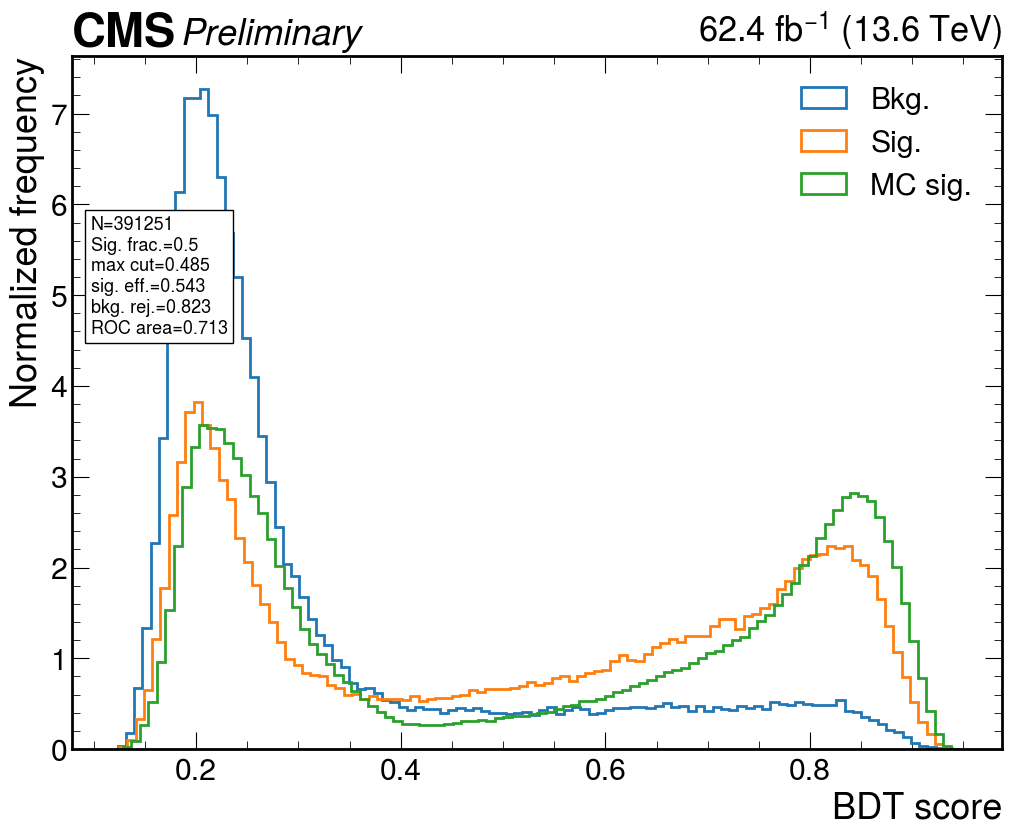

In [15]:
Y_forest_on_Jpsi = Trainer("Y", 'forest_standard') #Trainer object accessing model trained on Y data
Y_forest_on_Jpsi.complete_load("Jpsi", trigger="HLT_DoubleMu4_3_LowMass",include_MC=True) #Load Jpsi data for evaluation
Y_forest_on_Jpsi.plot_model(apply_weights=False,plot_training=False, plot_MC=True)

In [2]:
def nonPrompt_tail(x,N,b):
    return  N*expon.pdf(x,0,b)




Start loading data


Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/offline/Jpsi/merged_A.root to memory
Start loading MC data
Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/MC_InclusiveMinBias/Jpsi/merged_A.root to memory
sig_lims: [[3.0886, 3.0986]]
Start fitting function  <function nonPrompt_tail at 0x7f7aeb214b80> to variable  Mm_kin_lxy
Done fitting. Parameters:  541.3791495753949 0.1636008582214177

Some General infos:

                Total number of events considered: 286963 

                Sum of weights: 184562.81815385917 

                Fitted prompt: 183777.50884644545

                Sum of weights>0 184562.81815385917


Threw 0.03673306344954449 of bkg events
Total signal events: 286963
Total signal weight: 184562.81815385917, 0.66 of total weight
Defined training and evaluation datasets
loading model  /work/submit/mori25/Darkphotons_ludo/offline_analysis/BDT/trained_models/forest_standard_Y.json
loading successful


(0.8800280202721552, 0.7794391006284029, 0.8347577302571251)

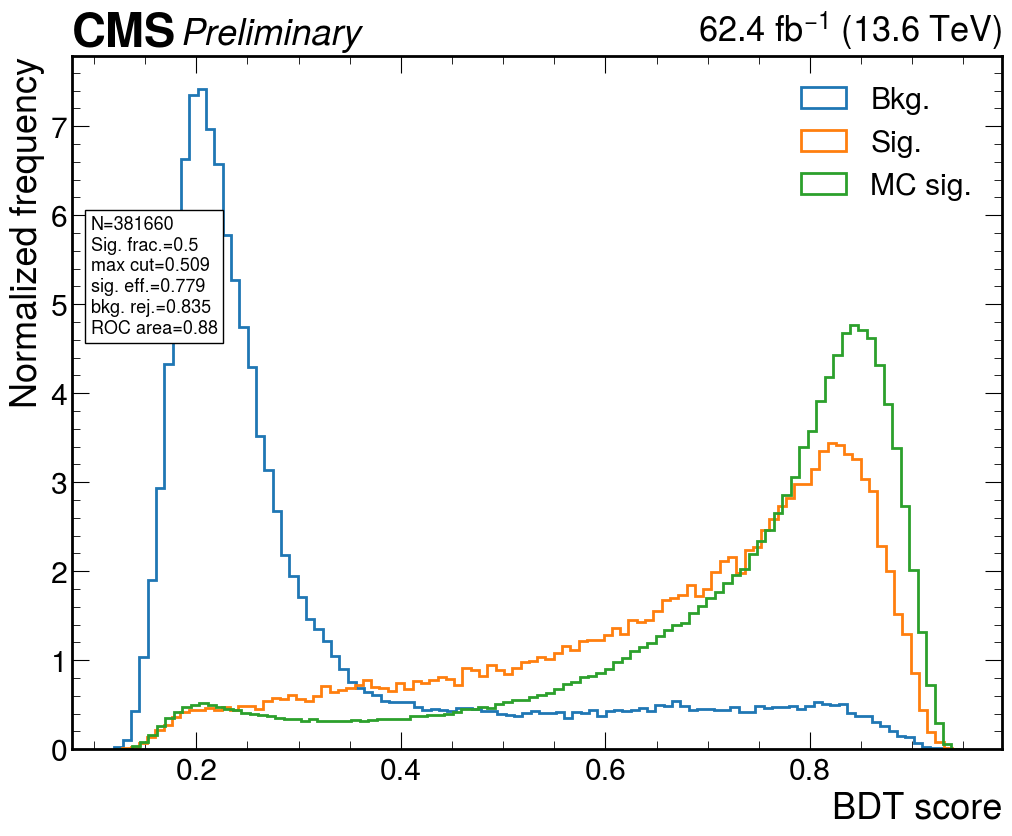

In [17]:
"""
Y-trained, evaluated on Jpsi dataset (ie like just above), however this time we apply a reweighing to the output signal (and to the MC)
"""

modelname = "forest_standard"
Y_forest_on_Jpsi_corr = Trainer("Y", modelname)
Y_forest_on_Jpsi_corr.load_data("Jpsi", trigger="HLT_DoubleMu4_3_LowMass", include_MC=True)
Y_forest_on_Jpsi_corr.prepare_training_set(data_particle="Jpsi",prompt_reweight=True,plot_reweight=False, plot_logscale=True,ylim= [1e2,1e6])
Y_forest_on_Jpsi_corr.load_model()
Y_forest_on_Jpsi_corr.plot_model(apply_weights=True,density=True, plot_MC=True)




Start loading data


Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/offline/Jpsi/merged_A.root to memory
Start loading MC data
Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/MC_InclusiveMinBias/Jpsi/merged_A.root to memory
sig_lims: [[3.0886, 3.0986]]
Start fitting function  <function nonPrompt_tail at 0x7f168dd08b80> to variable  Mm_kin_lxy
Done fitting. Parameters:  270.4246889257014 0.1633315301991383

Some General infos:

                Total number of events considered: 286963 

                Sum of weights: 184939.2811825561 

                Fitted prompt: 183852.8856695642

                Sum of weights>0 184939.2811825561


Threw 0.03673306344954449 of bkg events
Total signal events: 286963
Total signal weight: 184939.2811825561, 0.39 of total weight
Defined training and evaluation datasets
loading model  /work/submit/mori25/Darkphotons_ludo/offline_analysis/BDT/trained_models/forest_standard_Jpsi.json
loading successful


(0.888129720930483, 0.693427538545632, 0.8840430864786218)

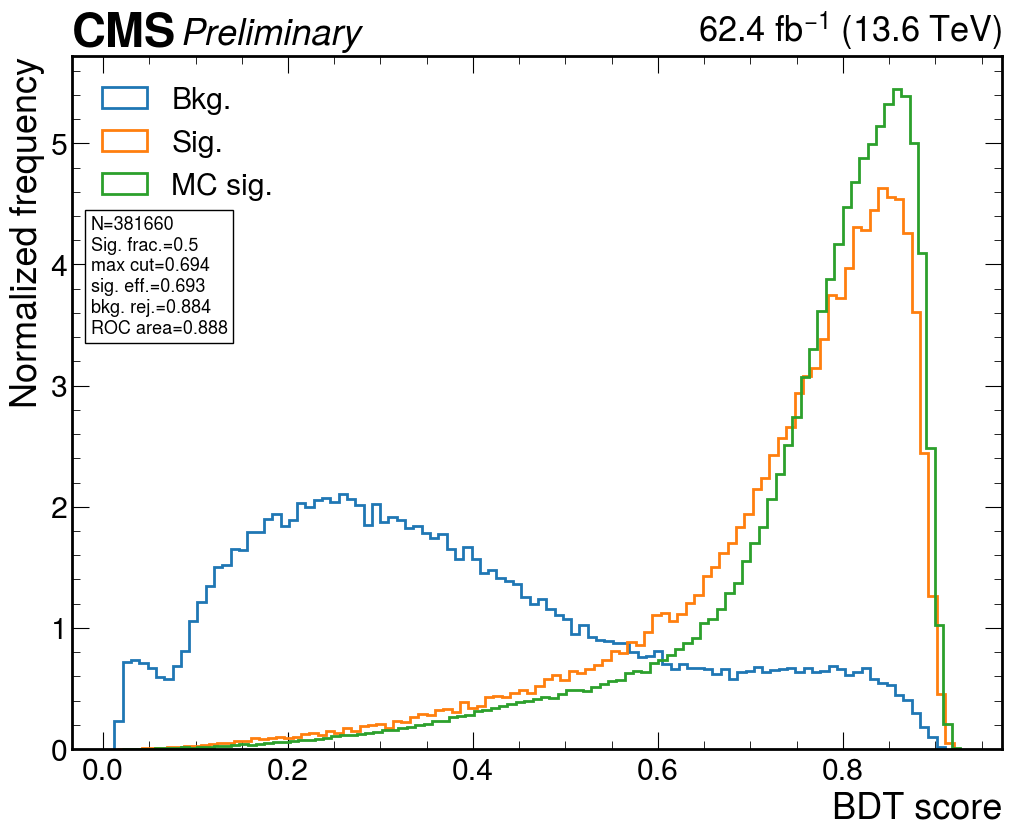

In [3]:
modelname = "forest_standard"
Jpsi_fs = Trainer("Jpsi", modelname)
Jpsi_fs.load_data(trigger="HLT_DoubleMu4_3_LowMass",include_MC=True)
Jpsi_fs.prepare_training_set(w_frac_bkg=1,prompt_reweight=True)
Jpsi_fs.load_model()
Jpsi_fs.plot_model(apply_weights=True,plot_MC=True)




Start loading data


Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/offline/Jpsi/merged_A.root to memory
Start loading MC data
Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/MC_InclusiveMinBias/Jpsi/merged_A.root to memory
sig_lims: [[3.0886, 3.0986]]
Start fitting function  <function nonPrompt_tail at 0x7fedeaaf8ae0> to variable  Mm_kin_lxy
Done fitting. Parameters:  270.4246889257014 0.1633315301991383

Some General infos:

                Total number of events considered: 286963 

                Sum of weights: 184939.2811825561 

                Fitted prompt: 183852.8856695642

                Sum of weights>0 184939.2811825561




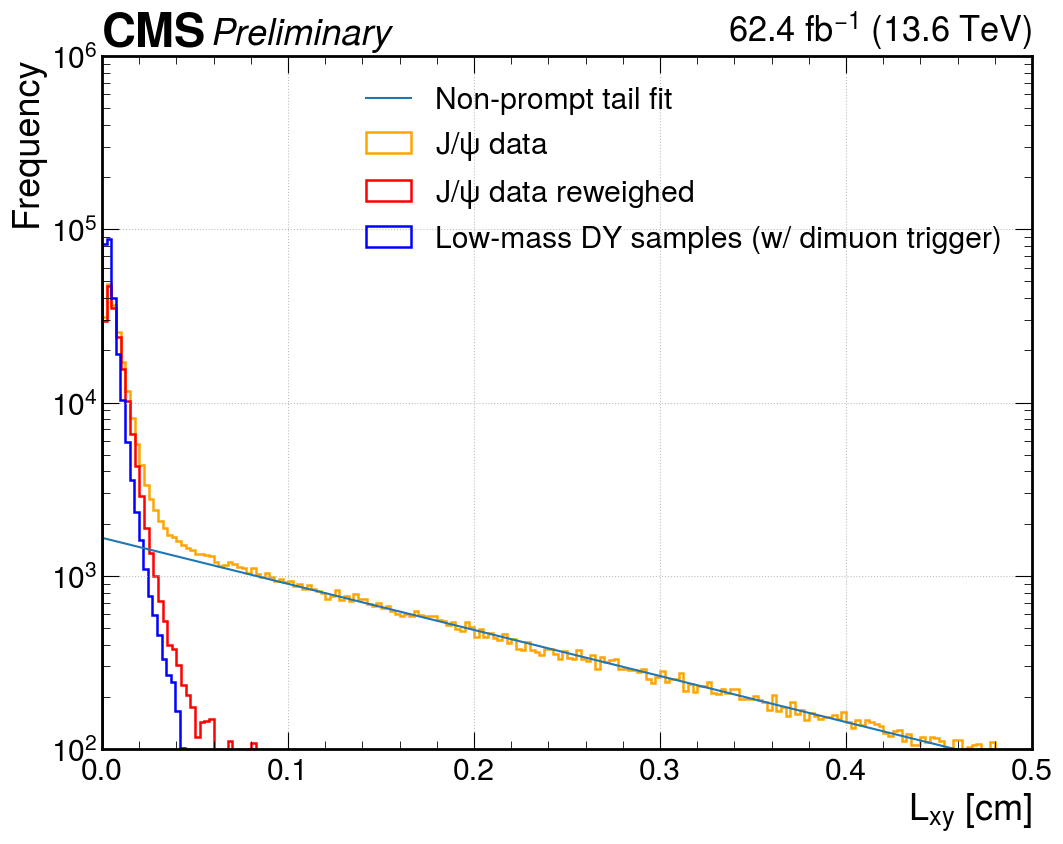

saved /home/submit/mori25/public_html/figures_thesis/Jpsi_lxy.png
Threw 0.03673306344954449 of bkg events
Total signal events: 286963
Total signal weight: 184939.2811825561, 0.66 of total weight
Defined training and evaluation datasets
loading model  /work/submit/mori25/Darkphotons_ludo/offline_analysis/BDT/trained_models/forest_prompt_Jpsi.json
loading successful


(0.9056855531944444, 0.7493484155558764, 0.8689921627602735)

<Figure size 1000x1000 with 0 Axes>

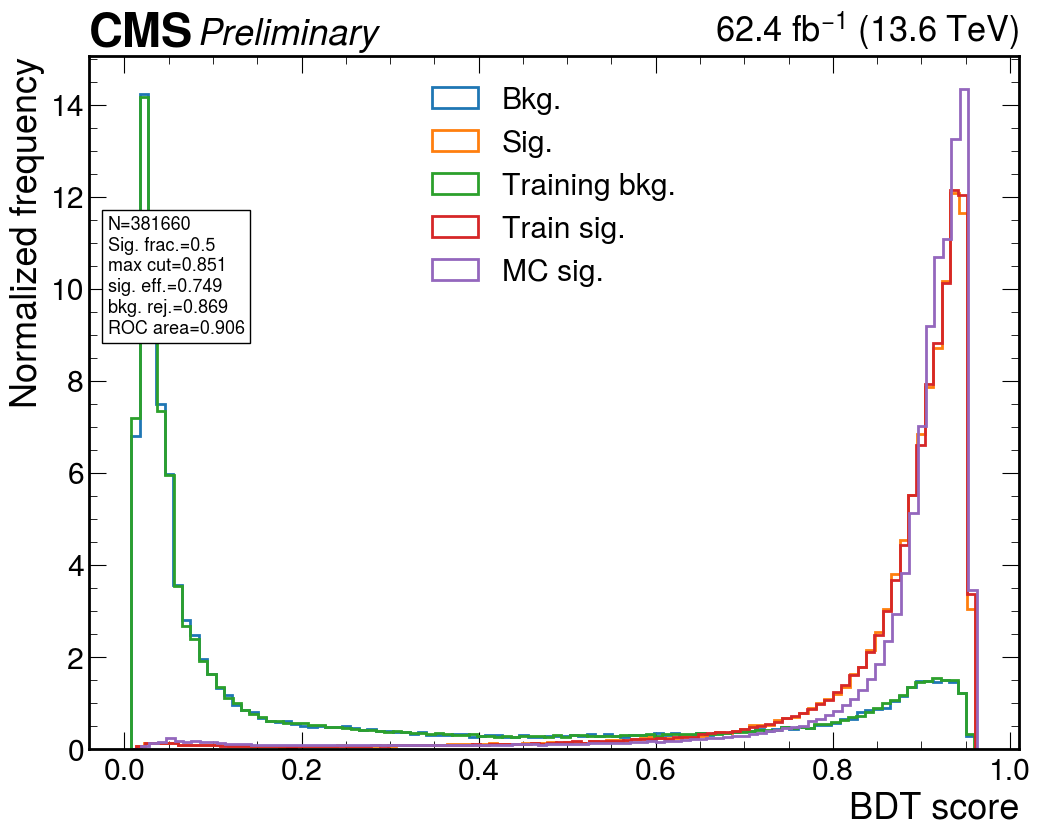

In [3]:
modelname = "forest_prompt"
Jpsi_fp = Trainer("Jpsi", modelname)
Jpsi_fp.load_data(trigger="HLT_DoubleMu4_3_LowMass",include_MC=True)
Jpsi_fp.prepare_training_set(prompt_reweight=True, plot_reweight=True, plot_logscale=True,ylim=(1e2,1e6))
Jpsi_fp.load_model()
Jpsi_fp.plot_model(apply_weights=True,plot_training=True,plot_MC=True,density=True)
# Jpsi_fp.plot_model(apply_weights=False,plot_MC=True,density=True)




Start loading data


Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/offline/Jpsi/merged_A.root to memory
Start loading MC data
Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/MC_InclusiveMinBias/Jpsi/merged_A.root to memory
sig_lims: [[3.0886, 3.0986]]
Start fitting function  <function nonPrompt_tail at 0x7f7aeb214b80> to variable  Mm_kin_lxy
Done fitting. Parameters:  606.1575471204777 0.16346991491435472

Some General infos:

                Total number of events considered: 294173 

                Sum of weights: 186670.52699114638 

                Fitted prompt: 185883.3593009802

                Sum of weights>0 186670.52699114638




/work/submit/mori25/Darkphotons_ludo/offline_analysis/BDT/training_offline.py:325: RuntimeWarning: divide by zero encountered in divide
  weight_hist = np.where(histSlxy==0,0, (histSlxy-fitting_func(x_corr,*mData.values)/dx_fit*dx_corr)/histSlxy)


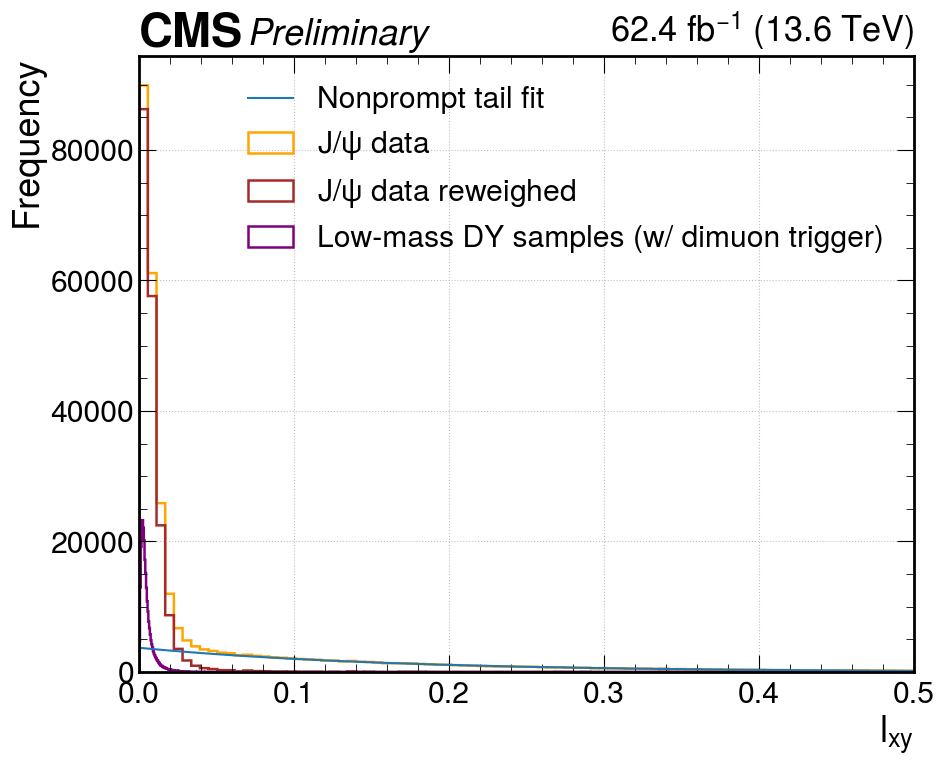

saved /home/submit/mori25/public_html/figures_thesis/Jpsi_lxy.png
Threw 0.012530798305505764 of bkg events
Total signal events: 294173
Total signal weight: 186670.52699114638, 0.66 of total weight
Defined training and evaluation datasets
loading model  /work/submit/mori25/Darkphotons_ludo/offline_analysis/BDT/trained_models/forest_prompt_noPromptCut_Jpsi.json
loading successful


(0.9036873686356279, 0.7415967481006863, 0.868098892953638)

<Figure size 1000x1000 with 0 Axes>

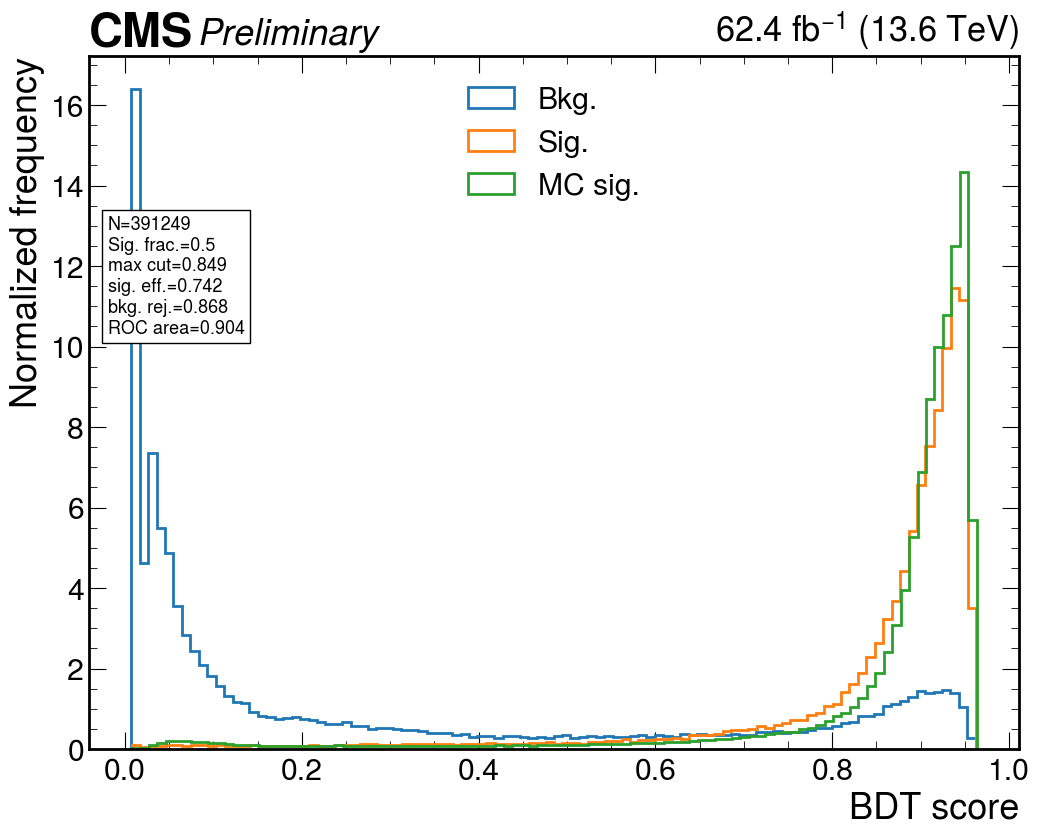

In [20]:
modelname = "forest_prompt_noPromptCut"
Jpsi_fp_nPC = Trainer("Jpsi", modelname)
Jpsi_fp_nPC.load_data(trigger="HLT_DoubleMu4_3_LowMass",include_MC=True)
Jpsi_fp_nPC.prepare_training_set(prompt_reweight=True, plot_reweight=True)
Jpsi_fp_nPC.load_model()
Jpsi_fp_nPC.plot_model(plot_MC=True, apply_weights=True)
# Jpsi_fp_nPC.plot_model(plot_MC=True, apply_weights=False)


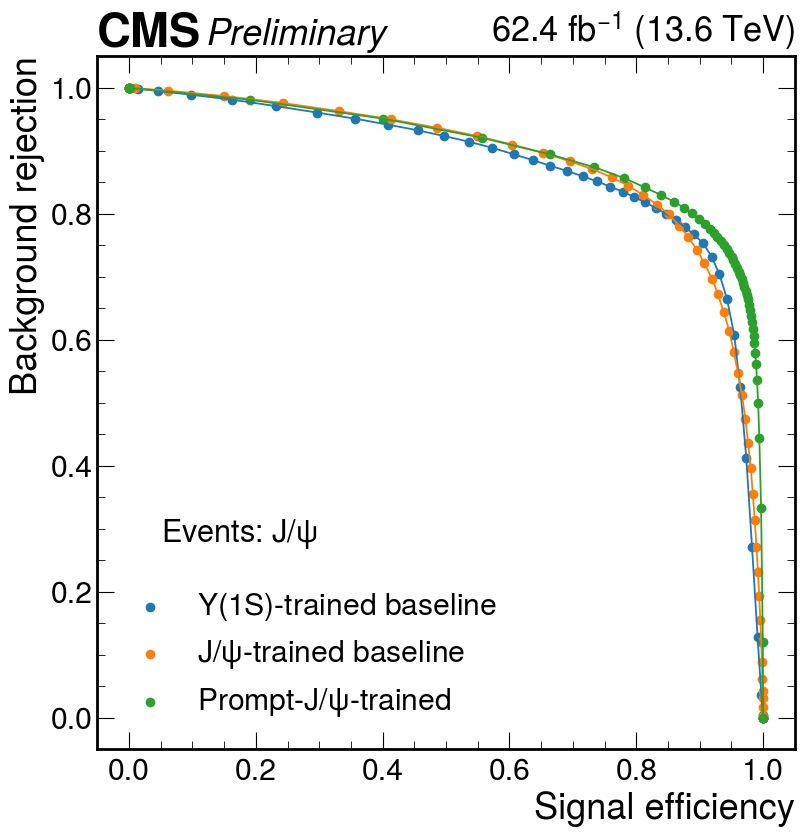

In [26]:
# plot_ROC([Y_forest_on_Jpsi,Y_forest_on_Jpsi_corr, Jpsi_fs,Jpsi_fp,Jpsi_fp_nPC], 
#          ["Standard forest (Y)", "Standard forest, reweighed (Y)","Standard forest (Jpsi)", "Prompt forest w/ lxy cut (Jpsi)", "Prompt forest w/o lxy cut (Jpsi)"],
#          [Y_forest_on_Jpsi.dval,Y_forest_on_Jpsi_corr.dval,Jpsi_fs.dval,Jpsi_fp.dval,Jpsi_fp_nPC.dval],n_points=50)
plot_ROC([Y_forest_on_Jpsi_corr, Jpsi_fs,Jpsi_fp], 
         [r"$\Upsilon(1S)$-trained baseline", r"$J/\psi$-trained baseline", r"Prompt-$J/\psi$-trained"],
        #  ["Standard forest (Y)", "Standard forest, reweighed (Y)","Standard forest (Jpsi)", "Prompt forest w/ lxy cut (Jpsi)"],
         [Y_forest_on_Jpsi_corr.dval,Jpsi_fs.dval,Jpsi_fp.dval],n_points=50,text=r"Events: $J/\psi$",textpos=(0.091,0.3),textsize=22)

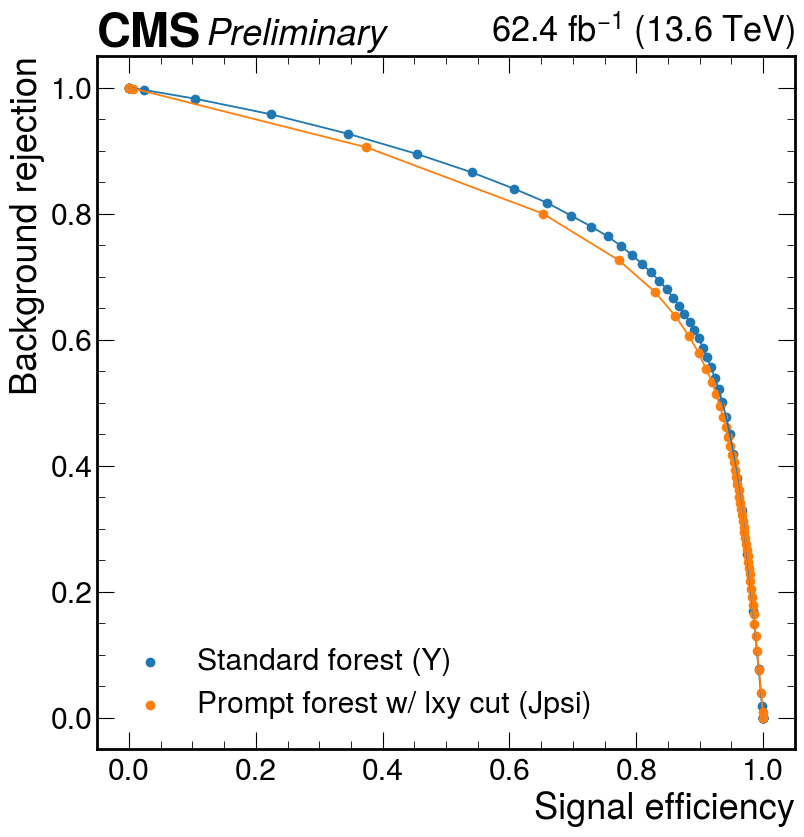

In [22]:
plot_ROC([Y_forest_on_Jpsi_corr ,Jpsi_fp], 
         [ "Standard forest (Y)","Prompt forest w/ lxy cut (Jpsi)"],
         [Y_forest.dval,Y_forest.dval],n_points=50)

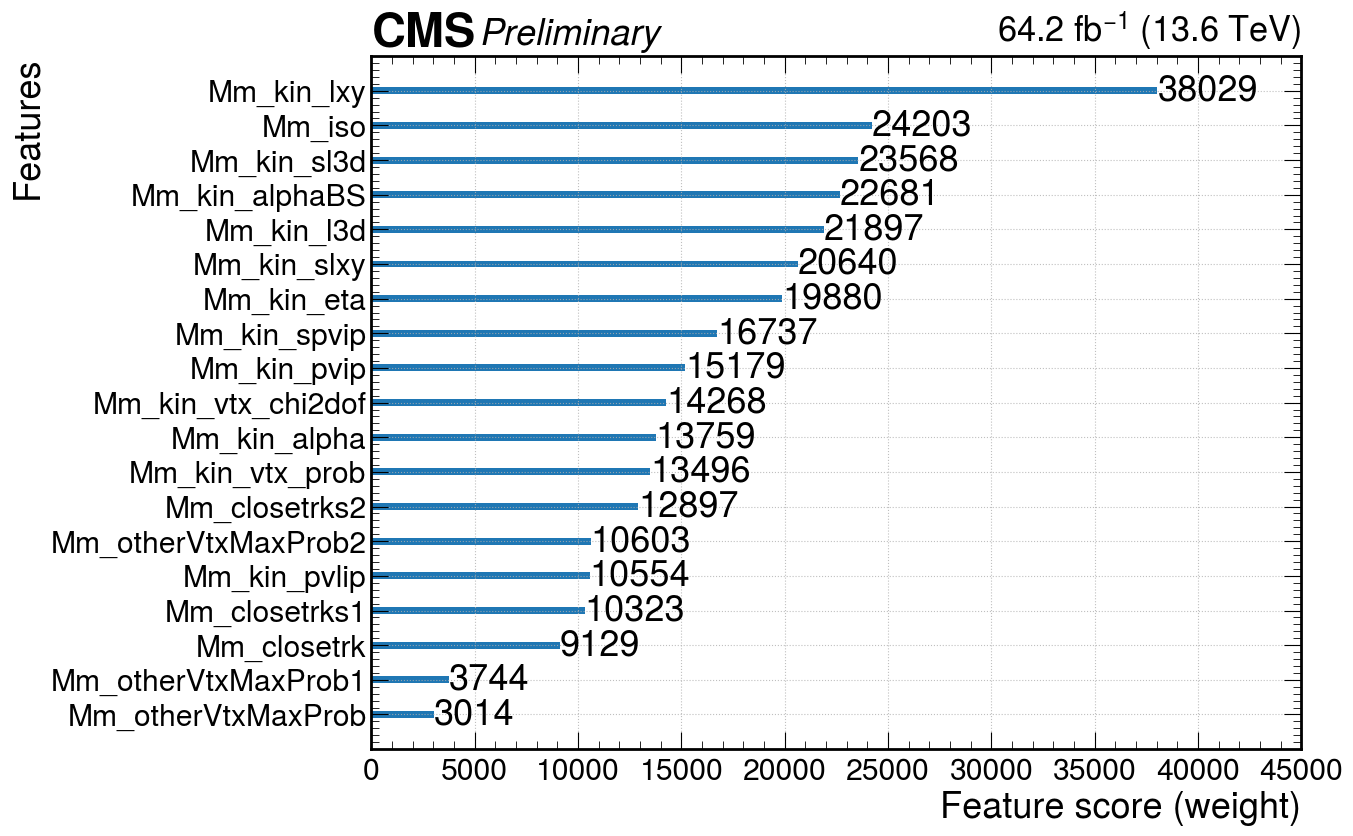

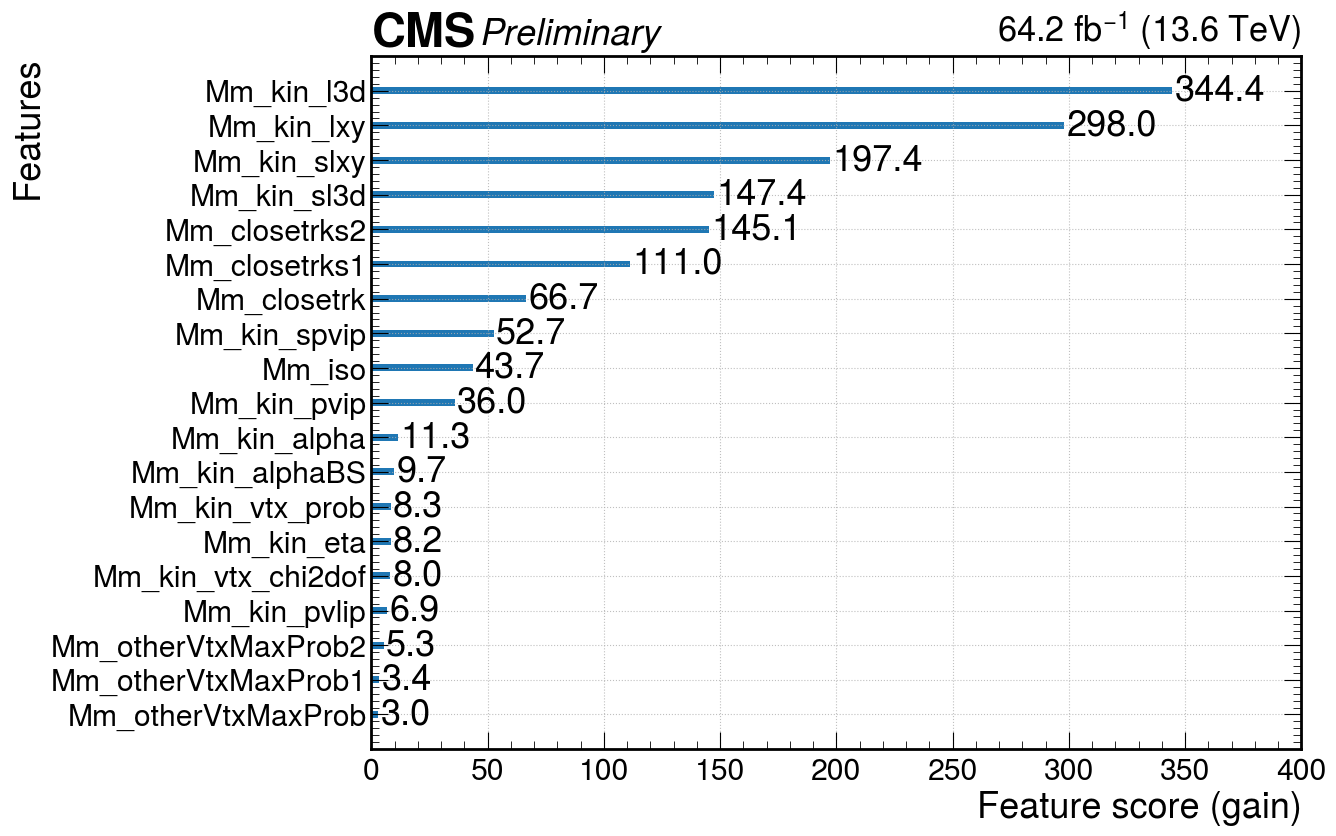

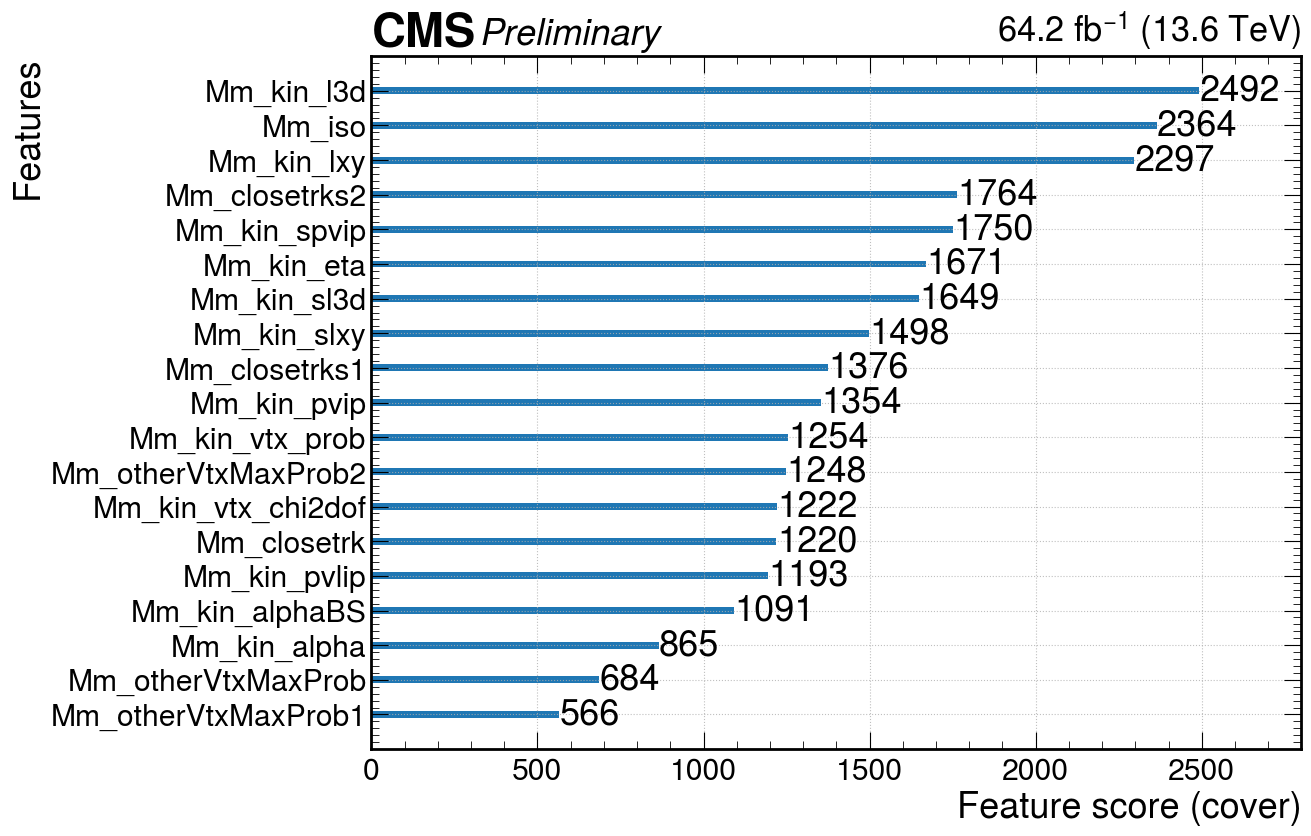

In [23]:
# xgb.plot_tree(Jpsi_fp.bst)
import mplhep as hep
hep.style.use("CMS")
colors = plt.cm.tab10.colors
for t,form,xlim in zip(['weight','gain','cover'],["{v:.0f}","{v:.1f}","{v:.0f}"],[(0,45000), (0,400), (0,2800)]):
    fig, ax = plt.subplots(figsize=(12,9))
    hep.cms.label("Preliminary",data=True,lumi=64.2,com=13.6)
    xgb.plot_importance(Jpsi_fp.bst,ax, show_values=True, importance_type=t, xlabel=f"Feature score ({t})", values_format = form, title = "",xlim=xlim)

In [24]:
# Jpsi_fp_nPC.plot_hist([Jpsi_fp_nPC.X_val["Mm_kin_lxy"][Jpsi_fp_nPC.y_val==1],
#                        Jpsi_fp_nPC.X_val["Mm_kin_lxy"][Jpsi_fp_nPC.y_val==0],
#                        Jpsi_fs.X_val["Mm_kin_lxy"][Jpsi_fs.y_val==1],
#                        Jpsi_fs.X_val["Mm_kin_lxy"][Jpsi_fs.y_val==0],
#                        Jpsi_fp_nPC.full_mass_range["Mm_kin_lxy"],
#                        ],
#                     ["Signal rew.","Background rew.","Signal","Background",'data rew'], 
#                     weights=[weights_fp_nPC[Jpsi_fp_nPC.X_val.index][Jpsi_fp_nPC.y_val==1],weights_fp_nPC[Jpsi_fp_nPC.X_val.index][Jpsi_fp_nPC.y_val==0],None,None,weights_fp_nPC], xlim=(0,5), xlabel = "lxy", log=True,density=True)

# Jpsi_fp.plot_hist([Jpsi_fp.X_val["Mm_kin_lxy"][Jpsi_fp.y_val==1][(Jpsi_fp.val_sig>0.32) & (Jpsi_fp.val_sig<0.42) ],
#                    Jpsi_fp.X_val["Mm_kin_lxy"][Jpsi_fp.y_val==1][(Jpsi_fp.val_sig>0.8) ],
#                    Jpsi_fp.X_val["Mm_kin_lxy"][Jpsi_fp.y_val==0],
                       
#                        ],
#                     ["Bkg-like Signal rew. ","Sig-like Signal rew.","Background"], 
#                     weights=[weights_fp[Jpsi_fp.X_val.index][Jpsi_fp.y_val==1][(Jpsi_fp.val_sig>0.32) & (Jpsi_fp.val_sig<0.42) ],
#                              weights_fp[Jpsi_fp.X_val.index][Jpsi_fp.y_val==1][(Jpsi_fp.val_sig>0.8) ],
#                              weights_fp[Jpsi_fp.X_val.index][Jpsi_fp.y_val==0]], xlim=(0,1), xlabel = "lxy", log=False,density=False)

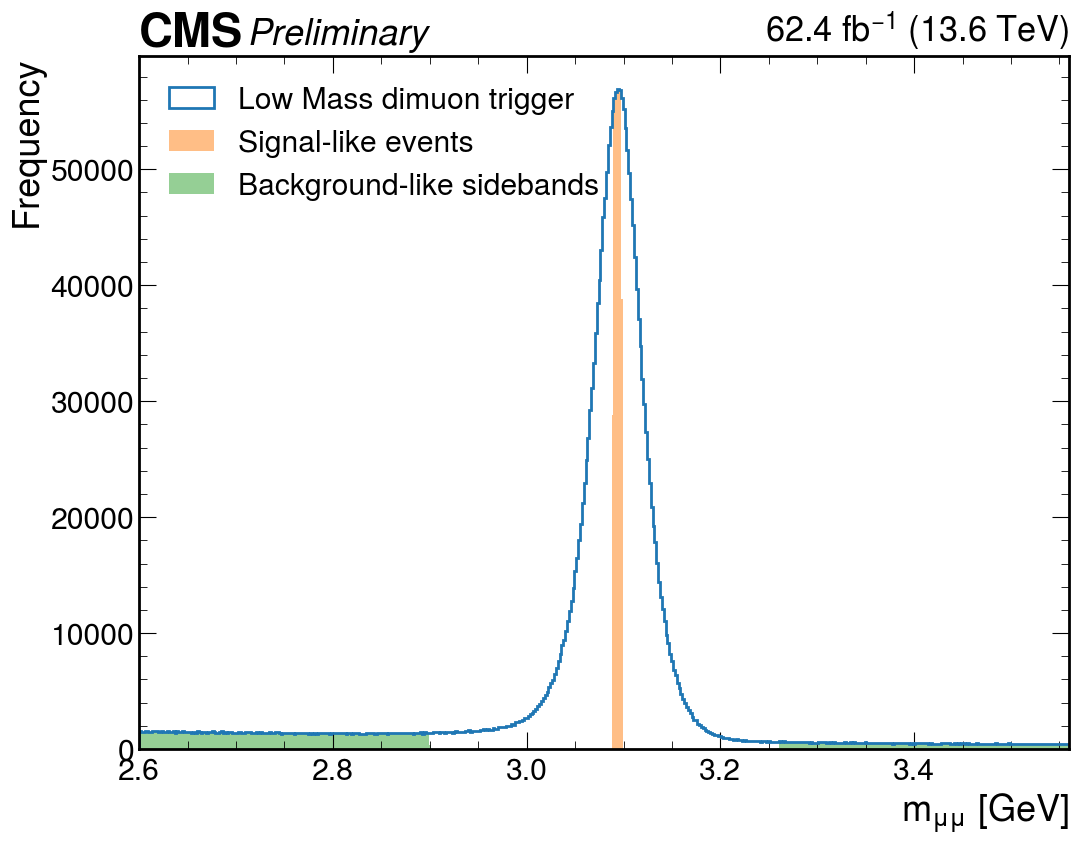

In [25]:
# Jpsi_fp.plot_hist([Jpsi_fp.full_mass_range["Mm_mass"],Jpsi_fp.bkg["Mm_mass"]],
#                     ["Signal","Background"], 
#                     weights=[None,None], xlim=(2.6,3.56), xlabel = "Dimuon mass", nbins = 500, log=False,density=True)

sig_lims = Jpsi_fp.particle_config["limits"]["signal"]
bkg_lims = Jpsi_fp.particle_config["limits"]["background"]

sig_cut = (Jpsi_fp.full_mass_range["Mm_mass"] < -1e3)
for lims in sig_lims:
    sig_cut = sig_cut | ((Jpsi_fp.full_mass_range["Mm_mass"]>lims[0])&(Jpsi_fp.full_mass_range["Mm_mass"]<lims[1]))
bkg_cut = (Jpsi_fp.full_mass_range["Mm_mass"] < -1e3)
for lims in bkg_lims:
    bkg_cut = bkg_cut | ((Jpsi_fp.full_mass_range["Mm_mass"]>lims[0])&(Jpsi_fp.full_mass_range["Mm_mass"]<lims[1]))


nsig = np.sum(sig_cut)
nbkg = np.sum(bkg_cut)
t = f"$N_{{sig}}={nsig}$\n$N_{{bkg}}={nbkg}$"

import mplhep as hep
hep.style.use("CMS")
colors = plt.cm.tab10.colors
fig, ax = plt.subplots(figsize=(12,9))
hep.cms.label("Preliminary",data=True,lumi=62.4, com=13.6)

ax.hist(Jpsi_fp.full_mass_range["Mm_mass"], bins = 500, range = (2.6,3.56), label="Low Mass dimuon trigger", color=colors[0], density = False, log=False, histtype='step', linewidth=2)
ax.hist(Jpsi_fp.full_mass_range[sig_cut]["Mm_mass"], bins = 500, range = (2.6,3.56), label="Signal-like events", color=colors[1], density = False, log=False,alpha = 0.5)
ax.hist(Jpsi_fp.full_mass_range[bkg_cut]["Mm_mass"], bins = 500, range = (2.6,3.56), label="Background-like sidebands", color=colors[2], density = False, log=False,alpha = 0.5)
ax.set_xlabel("$m_{\mu\mu}$ [GeV]")
ax.set_ylabel('Frequency')
# ax.text(0.86, .72, t, fontsize=13, bbox=dict(facecolor='white', edgecolor='black'), transform=ax.transAxes )
ax.set_xlim((2.6,3.56))
ax.legend(loc='upper left')#fontsize=13,frameon=True,edgecolor='black',fancybox=False)
# ax.grid(True)

In [ ]:
stop

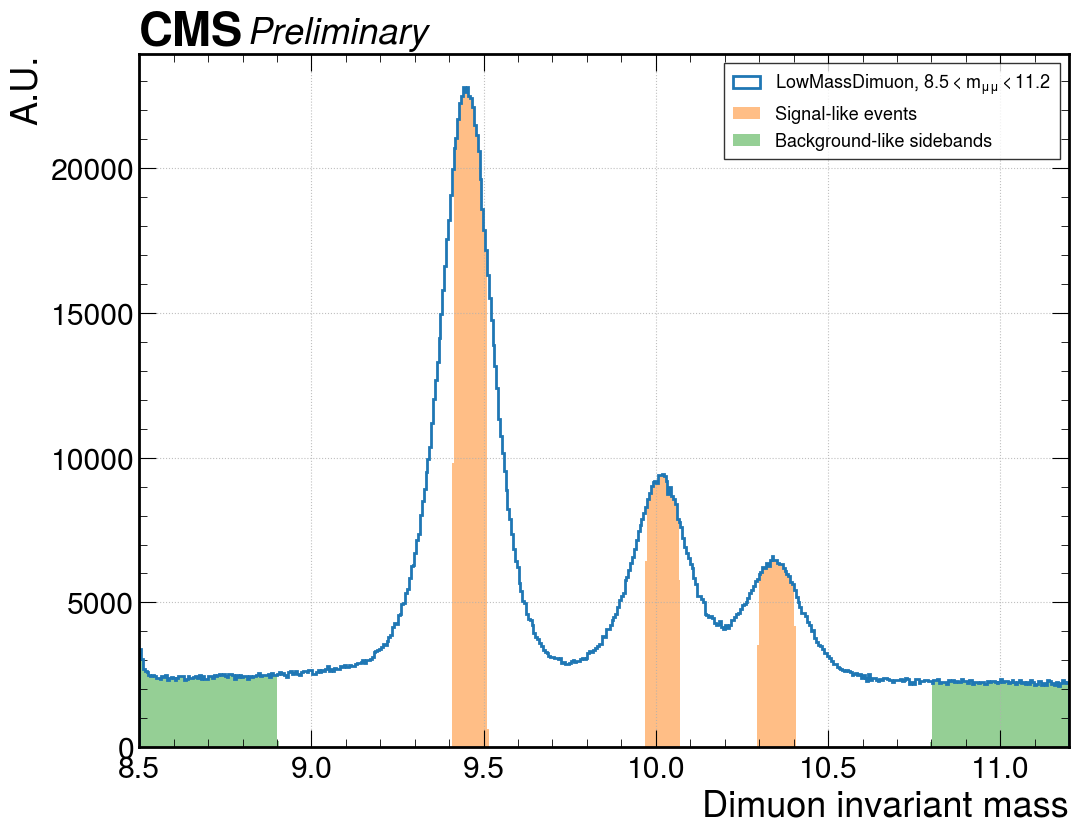

In [ ]:
sig_lims = Y_tree.particle_config["limits"]["signal"]
bkg_lims = Y_tree.particle_config["limits"]["background"]

nsigY = []

sig_cut = (Y_tree.full_mass_range["Mm_mass"] < -1e3)
for lims in sig_lims:
    sig_cut = sig_cut | ((Y_tree.full_mass_range["Mm_mass"]>lims[0])&(Y_tree.full_mass_range["Mm_mass"]<lims[1]))
    nsigY.append(np.sum((Y_tree.full_mass_range["Mm_mass"]>lims[0])&(Y_tree.full_mass_range["Mm_mass"]<lims[1])))
bkg_cut = (Y_tree.full_mass_range["Mm_mass"] < -1e3)
for lims in bkg_lims:
    bkg_cut = bkg_cut | ((Y_tree.full_mass_range["Mm_mass"]>lims[0])&(Y_tree.full_mass_range["Mm_mass"]<lims[1]))

nbkg = np.sum(bkg_cut)

t = f"""$N_{{sig}}^{{Y(1S)}}={nsigY[0]}$\n$N_{{sig}}^{{Y(2S)}}={nsigY[1]}$\n$N_{{sig}}^{{Y(3S)}}={nsigY[2]}$\n$N_{{bkg}}={nbkg}$"""

import mplhep as hep
hep.style.use("CMS")
colors = plt.cm.tab10.colors
fig, ax = plt.subplots(figsize=(12,9))
hep.cms.text("Preliminary")
ax.hist(Y_tree.full_mass_range["Mm_mass"], bins = 500, range = (8.5,11.2), label="LowMassDimuon, $8.5<m_{\mu\mu}<11.2$", color=colors[0], density = False, log=False, histtype='step', linewidth=2)
ax.hist(Y_tree.full_mass_range[sig_cut]["Mm_mass"], bins = 500, range = (8.5,11.2), label="Signal-like events", color=colors[1], density = False, log=False,alpha = 0.5)
ax.hist(Y_tree.full_mass_range[bkg_cut]["Mm_mass"], bins = 500, range = (8.5,11.2), label="Background-like sidebands", color=colors[2], density = False, log=False,alpha = 0.5)
ax.set_xlabel("Dimuon invariant mass")
ax.set_ylabel('A.U.')
ax.set_xlim((8.5,11.2))
# ax.text(0.81, .62, t, fontsize=13, bbox=dict(facecolor='white', edgecolor='black'), transform=ax.transAxes )
ax.legend(fontsize=13,frameon=True,edgecolor='black',fancybox=False)
ax.grid(True)

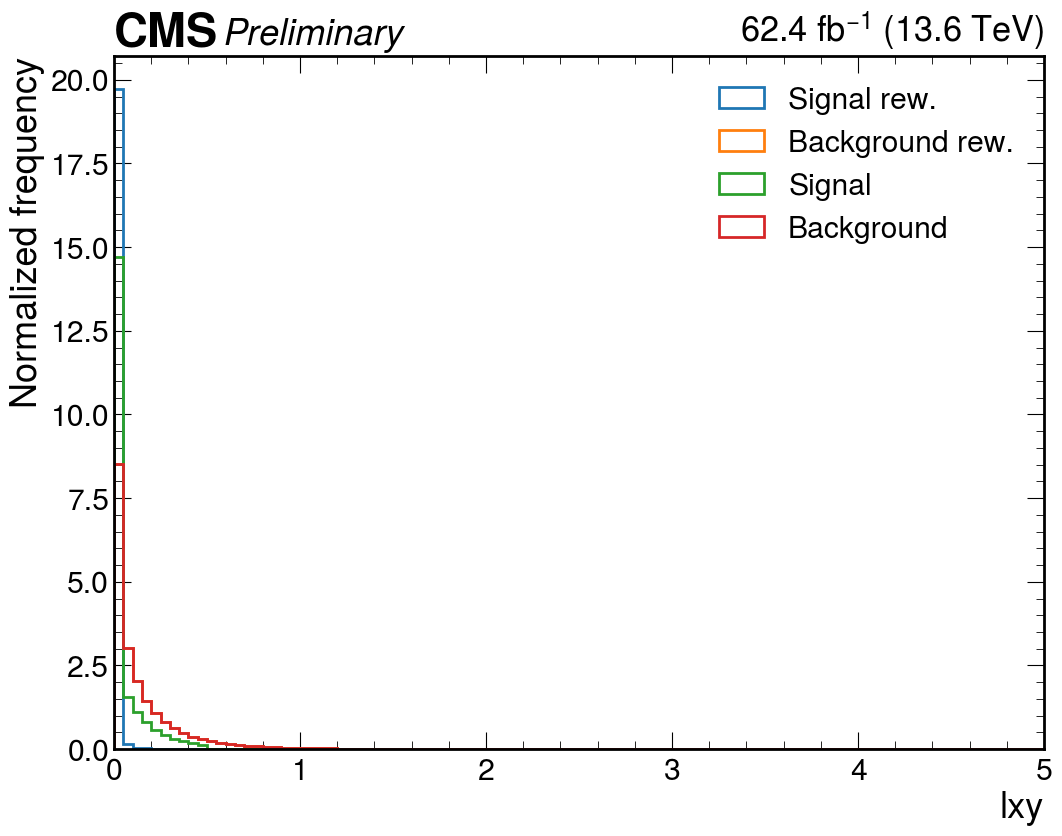

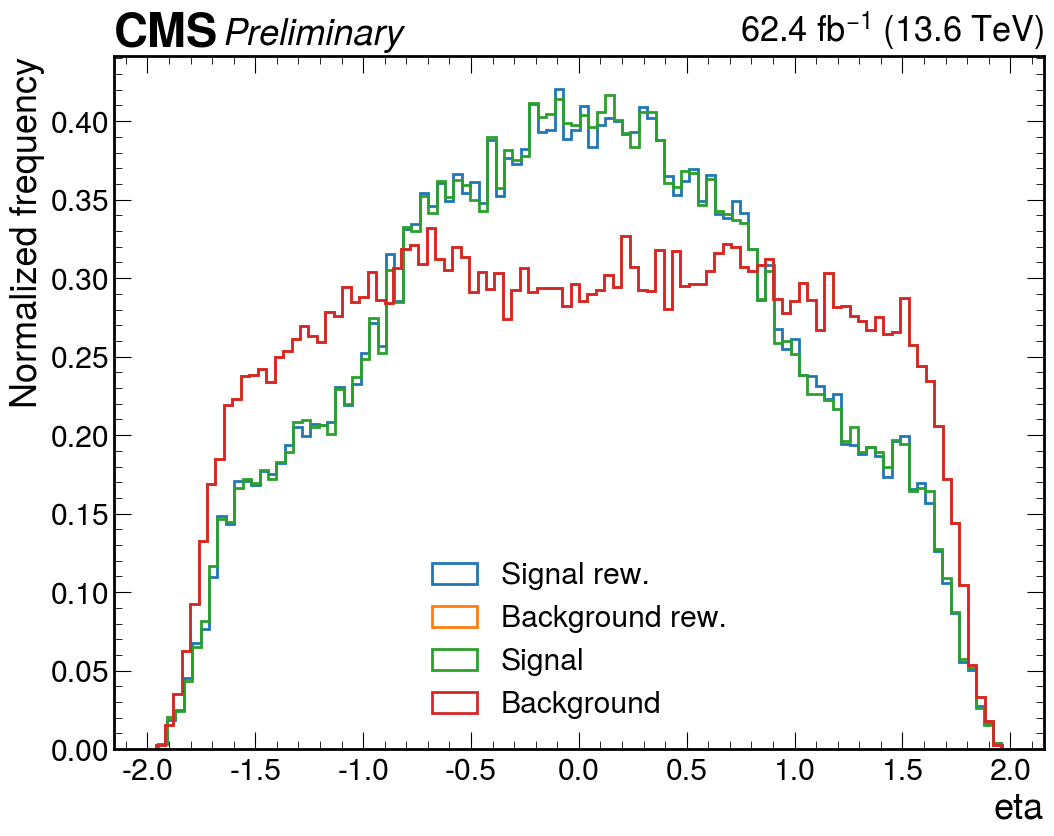

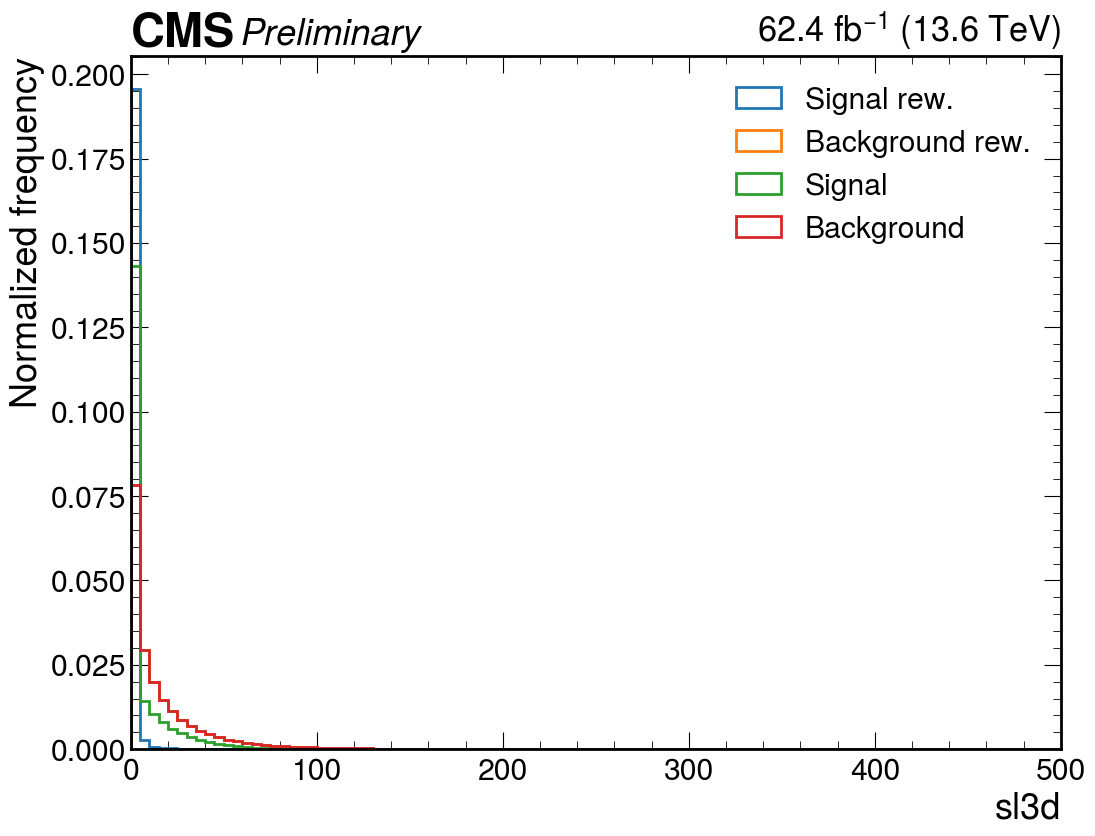

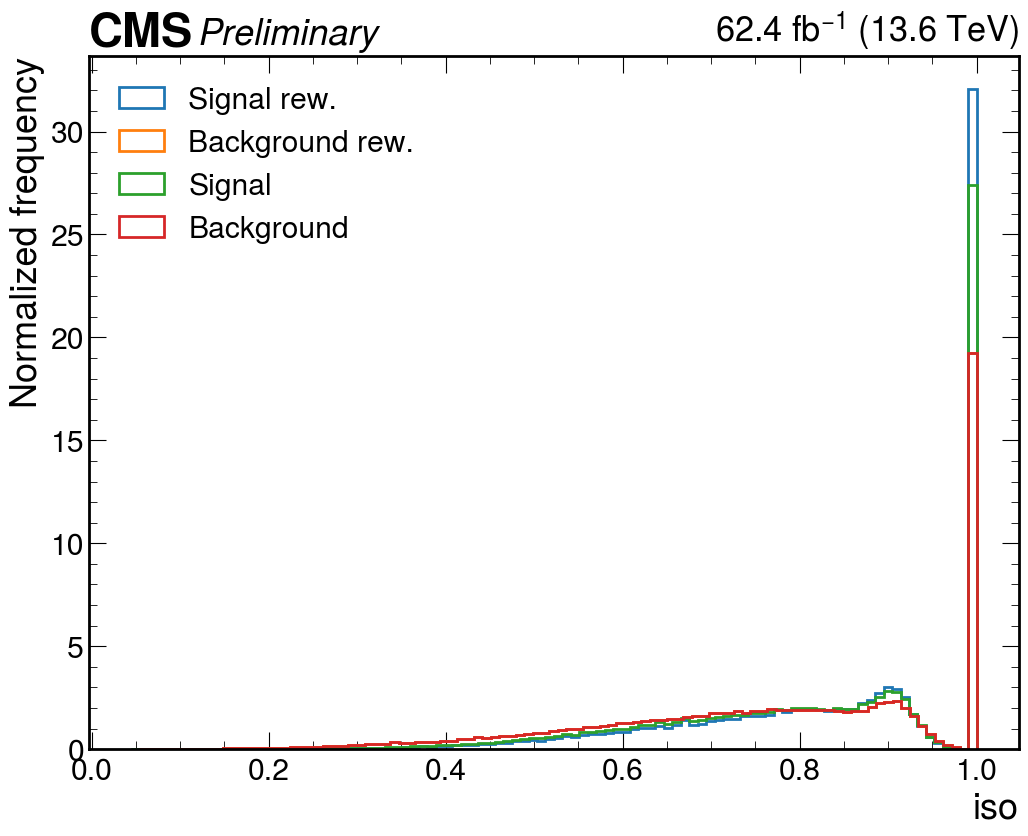

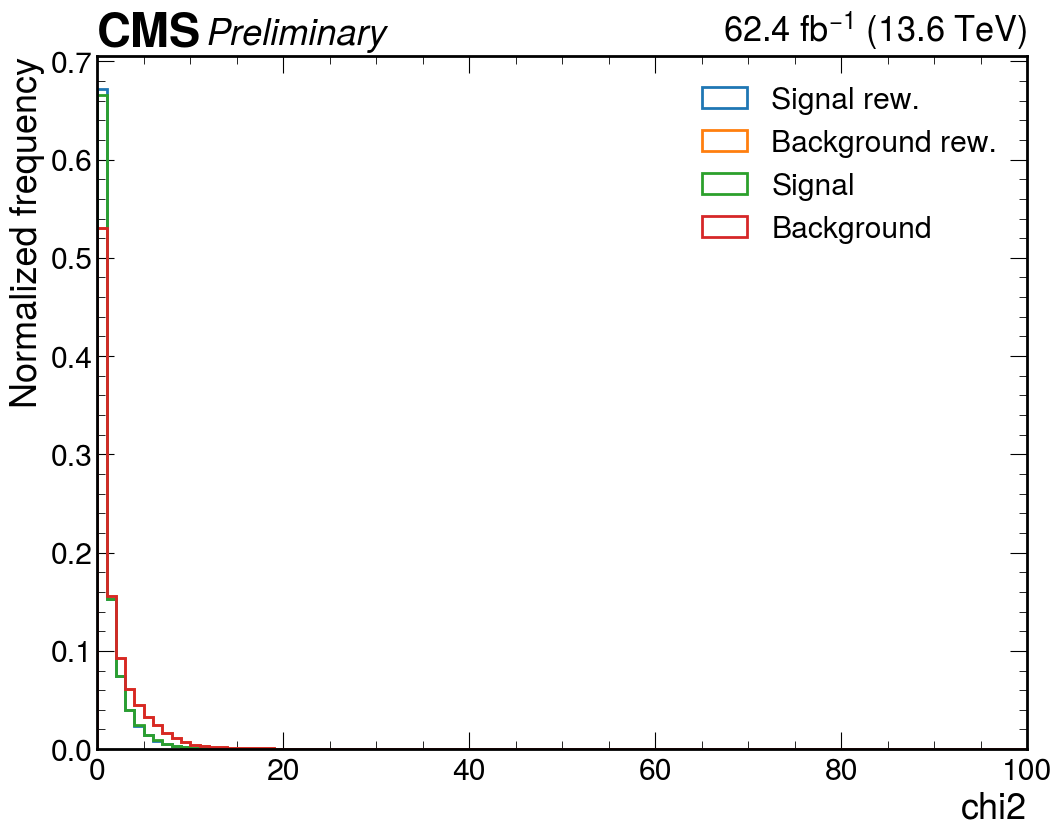

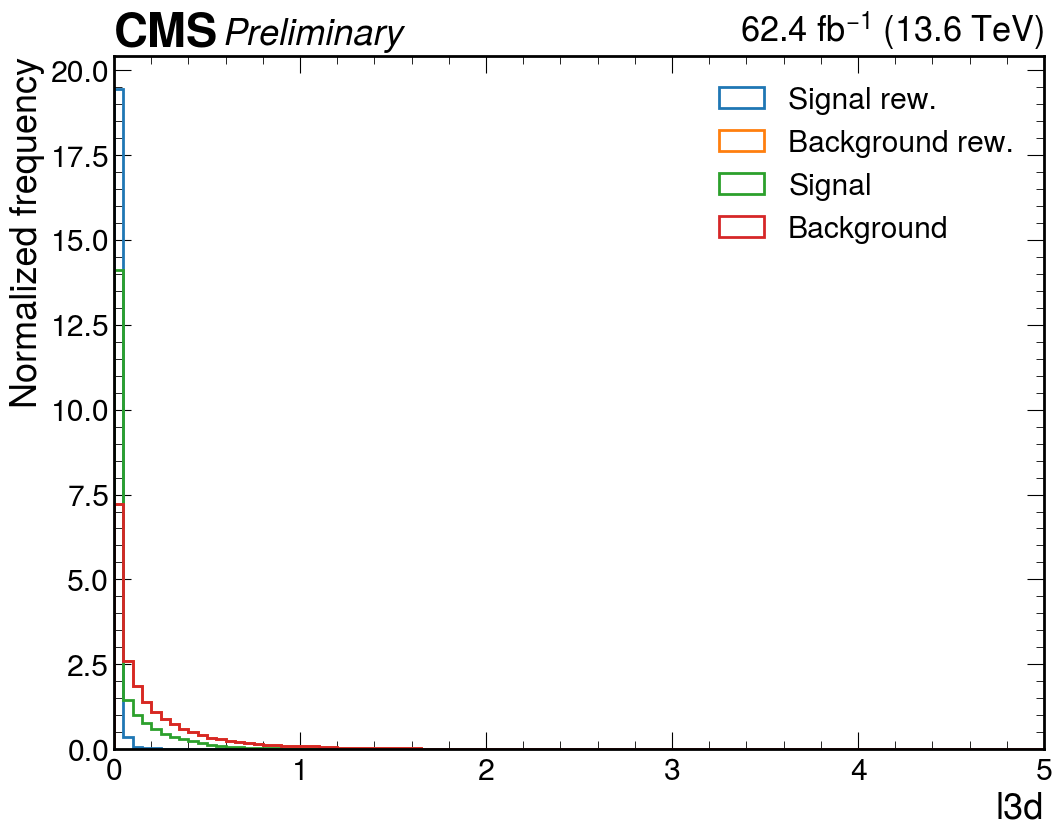

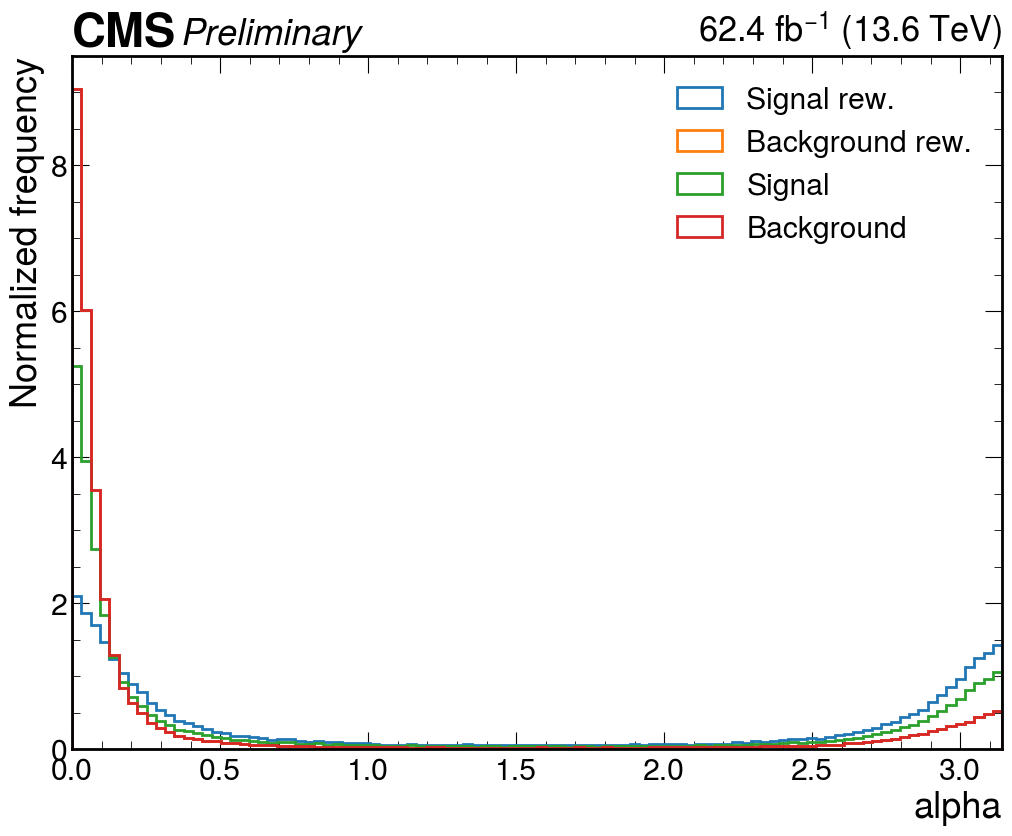

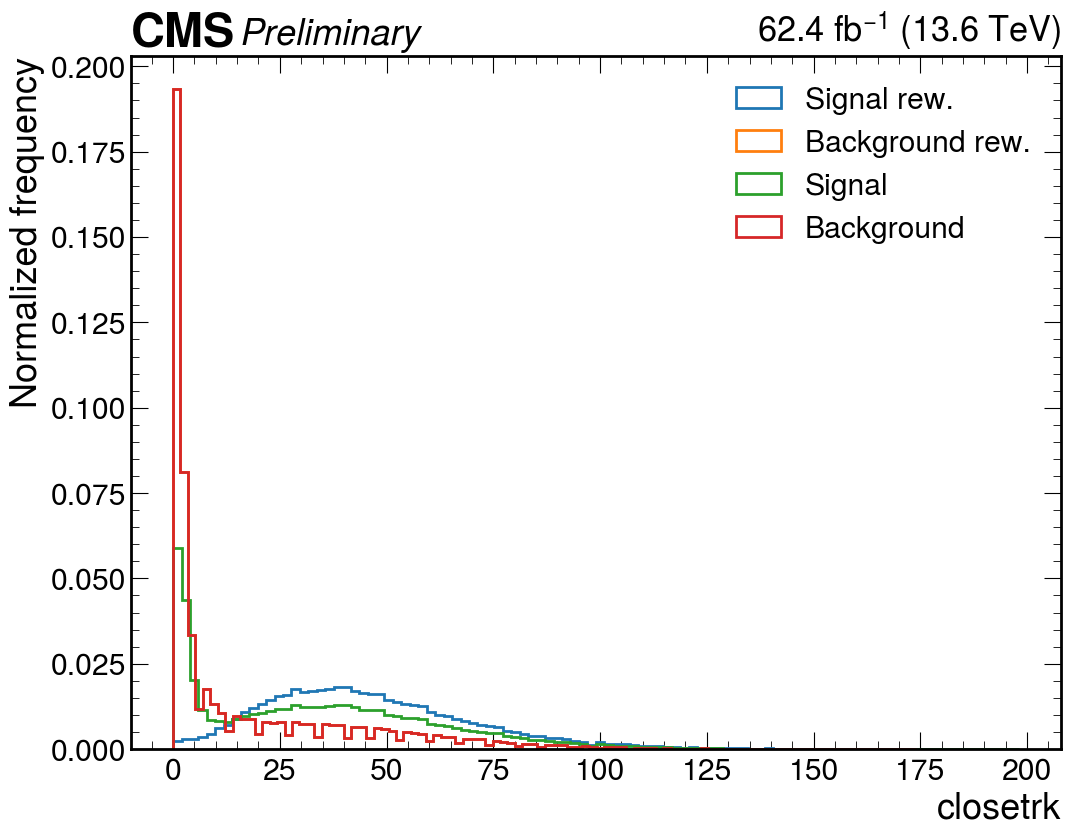

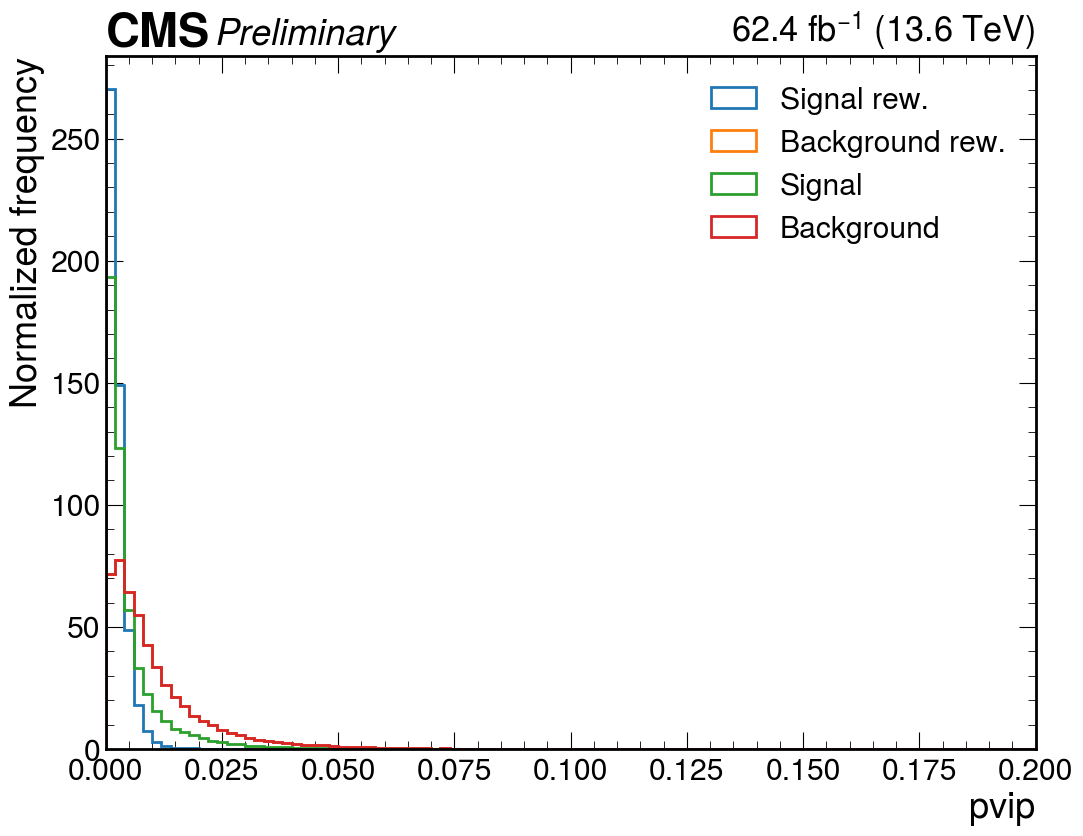

In [ ]:
log=False
Jpsi_fp.plot_hist([Jpsi_fp.X_val["Mm_kin_lxy"][Jpsi_fp.y_val==1],
                       Jpsi_fp.X_val["Mm_kin_lxy"][Jpsi_fp.y_val==0],
                       Jpsi_fs.X_val["Mm_kin_lxy"][Jpsi_fs.y_val==1],
                       Jpsi_fs.X_val["Mm_kin_lxy"][Jpsi_fs.y_val==0]],
                    ["Signal rew.","Background rew.","Signal","Background"], 
                    weights=[Jpsi_fp.weights[Jpsi_fp.X_val.index][Jpsi_fp.y_val==1],Jpsi_fp.weights[Jpsi_fp.X_val.index][Jpsi_fp.y_val==0],None,None], xlim=(0,5), xlabel = "lxy", log=log,density=True)
Jpsi_fp.plot_hist([Jpsi_fp.X_val["Mm_kin_eta"][Jpsi_fp.y_val==1],
                       Jpsi_fp.X_val["Mm_kin_eta"][Jpsi_fp.y_val==0],
                       Jpsi_fs.X_val["Mm_kin_eta"][Jpsi_fs.y_val==1],
                       Jpsi_fs.X_val["Mm_kin_eta"][Jpsi_fs.y_val==0]], 
                    ["Signal rew.","Background rew.","Signal","Background"], 
                    weights=[Jpsi_fp.weights[Jpsi_fp.X_val.index][Jpsi_fp.y_val==1],Jpsi_fp.weights[Jpsi_fp.X_val.index][Jpsi_fp.y_val==0],None,None],  xlabel="eta", log=log,density=True)
Jpsi_fp.plot_hist([Jpsi_fp.X_val["Mm_kin_sl3d"][Jpsi_fp.y_val==1],
                       Jpsi_fp.X_val["Mm_kin_sl3d"][Jpsi_fp.y_val==0],
                       Jpsi_fs.X_val["Mm_kin_sl3d"][Jpsi_fs.y_val==1],
                       Jpsi_fs.X_val["Mm_kin_sl3d"][Jpsi_fs.y_val==0]], 
                    ["Signal rew.","Background rew.","Signal","Background"], 
                    weights=[Jpsi_fp.weights[Jpsi_fp.X_val.index][Jpsi_fp.y_val==1],Jpsi_fp.weights[Jpsi_fp.X_val.index][Jpsi_fp.y_val==0],None,None],  xlim=(0,500), xlabel = 'sl3d', log=log,density=True)
Jpsi_fp.plot_hist([Jpsi_fp.X_val["Mm_iso"][Jpsi_fp.y_val==1],
                       Jpsi_fp.X_val["Mm_iso"][Jpsi_fp.y_val==0],
                       Jpsi_fs.X_val["Mm_iso"][Jpsi_fs.y_val==1],
                       Jpsi_fs.X_val["Mm_iso"][Jpsi_fs.y_val==0]], 
                    ["Signal rew.","Background rew.","Signal","Background"], 
                    weights=[Jpsi_fp.weights[Jpsi_fp.X_val.index][Jpsi_fp.y_val==1],Jpsi_fp.weights[Jpsi_fp.X_val.index][Jpsi_fp.y_val==0],None,None], xlabel = 'iso', log=log,density=True)
Jpsi_fp.plot_hist([Jpsi_fp.X_val["Mm_kin_vtx_chi2dof"][Jpsi_fp.y_val==1],
                       Jpsi_fp.X_val["Mm_kin_vtx_chi2dof"][Jpsi_fp.y_val==0],
                       Jpsi_fs.X_val["Mm_kin_vtx_chi2dof"][Jpsi_fs.y_val==1],
                       Jpsi_fs.X_val["Mm_kin_vtx_chi2dof"][Jpsi_fs.y_val==0]], 
                    ["Signal rew.","Background rew.","Signal","Background"], 
                    weights=[Jpsi_fp.weights[Jpsi_fp.X_val.index][Jpsi_fp.y_val==1],Jpsi_fp.weights[Jpsi_fp.X_val.index][Jpsi_fp.y_val==0],None,None],  xlabel = 'chi2', xlim = (0,100), log=log,density=True)
Jpsi_fp.plot_hist([Jpsi_fp.X_val["Mm_kin_l3d"][Jpsi_fp.y_val==1],
                       Jpsi_fp.X_val["Mm_kin_l3d"][Jpsi_fp.y_val==0],
                       Jpsi_fs.X_val["Mm_kin_l3d"][Jpsi_fs.y_val==1],
                       Jpsi_fs.X_val["Mm_kin_l3d"][Jpsi_fs.y_val==0]], 
                    ["Signal rew.","Background rew.","Signal","Background"], 
                    weights=[Jpsi_fp.weights[Jpsi_fp.X_val.index][Jpsi_fp.y_val==1],Jpsi_fp.weights[Jpsi_fp.X_val.index][Jpsi_fp.y_val==0],None,None], xlabel='l3d', xlim=(0,5), log=log,density=True)
Jpsi_fp.plot_hist([Jpsi_fp.X_val["Mm_kin_alpha"][Jpsi_fp.y_val==1],
                       Jpsi_fp.X_val["Mm_kin_alpha"][Jpsi_fp.y_val==0],
                       Jpsi_fs.X_val["Mm_kin_alpha"][Jpsi_fs.y_val==1],
                       Jpsi_fs.X_val["Mm_kin_alpha"][Jpsi_fs.y_val==0]], 
                    ["Signal rew.","Background rew.","Signal","Background"], 
                    weights=[Jpsi_fp.weights[Jpsi_fp.X_val.index][Jpsi_fp.y_val==1],Jpsi_fp.weights[Jpsi_fp.X_val.index][Jpsi_fp.y_val==0],None,None],  xlabel='alpha',xlim=(0,3.142), log=log,density=True)
Jpsi_fp.plot_hist([Jpsi_fp.X_val["Mm_closetrk"][Jpsi_fp.y_val==1],
                       Jpsi_fp.X_val["Mm_closetrk"][Jpsi_fp.y_val==0],
                       Jpsi_fs.X_val["Mm_closetrk"][Jpsi_fs.y_val==1],
                       Jpsi_fs.X_val["Mm_closetrk"][Jpsi_fs.y_val==0]], 
                    ["Signal rew.","Background rew.","Signal","Background"], 
                    weights=[Jpsi_fp.weights[Jpsi_fp.X_val.index][Jpsi_fp.y_val==1],Jpsi_fp.weights[Jpsi_fp.X_val.index][Jpsi_fp.y_val==0],None,None], xlabel='closetrk', log=log,density=True)
Jpsi_fp.plot_hist([Jpsi_fp.X_val["Mm_kin_pvip"][Jpsi_fp.y_val==1],
                       Jpsi_fp.X_val["Mm_kin_pvip"][Jpsi_fp.y_val==0],
                       Jpsi_fs.X_val["Mm_kin_pvip"][Jpsi_fs.y_val==1],
                       Jpsi_fs.X_val["Mm_kin_pvip"][Jpsi_fs.y_val==0]], 
                    ["Signal rew.","Background rew.","Signal","Background"], 
                    weights=[Jpsi_fp.weights[Jpsi_fp.X_val.index][Jpsi_fp.y_val==1],Jpsi_fp.weights[Jpsi_fp.X_val.index][Jpsi_fp.y_val==0],None,None], xlabel='pvip', xlim=(0,0.2), log=log,density=True)

Now look for optimal discriminators

In [ ]:
predY = Y_forest.bst.predict(xgb.DMatrix(Y_forest.trainData_skinny))
predJpsi = Y_forest.bst.predict(xgb.DMatrix(Y_forest_on_Jpsi_corr.trainData_skinny))

In [ ]:
#Study cuts on discriminators to optimize for Y

id1Y=Y_tree.trainData["Muon_softMva1"]
id2Y=Y_tree.trainData["Muon_softMva2"]
sig_cut = Y_tree.trainData["Score"]==1
bkg_cut = Y_tree.trainData["Score"]==0

def efficiencyY(id_lim,dis_lim):
    sig = (predY[sig_cut] > dis_lim) & (id1Y[sig_cut] > id_lim) & (id2Y[sig_cut] > id_lim)
    s = np.sum(sig)
    bkg = (predY[bkg_cut] > dis_lim) & (id1Y[bkg_cut] > id_lim) & (id2Y[bkg_cut] > id_lim)
    b = np.sum(bkg)
    return s/np.sqrt(b) if b!= 0 else 0

In [ ]:
id_vals = np.linspace(0.2,0.5,50)
vtx_vals= np.linspace(0.45,0.9,50)
XY, YY = np.meshgrid(id_vals,vtx_vals)
effY = np.vectorize(efficiencyY)(XY,YY)
idxY = np.unravel_index(np.argmax(effY),effY.shape)
print("Optimal discriminator cuts: \n SoftMVA (Muon ID): ", XY[idxY], "\n BDT (Vertex quantities): ", YY[idxY])

Optimal discriminator cuts: 
 SoftMVA (Muon ID):  0.4387755102040816 
 BDT (Vertex quantities):  0.6612244897959184


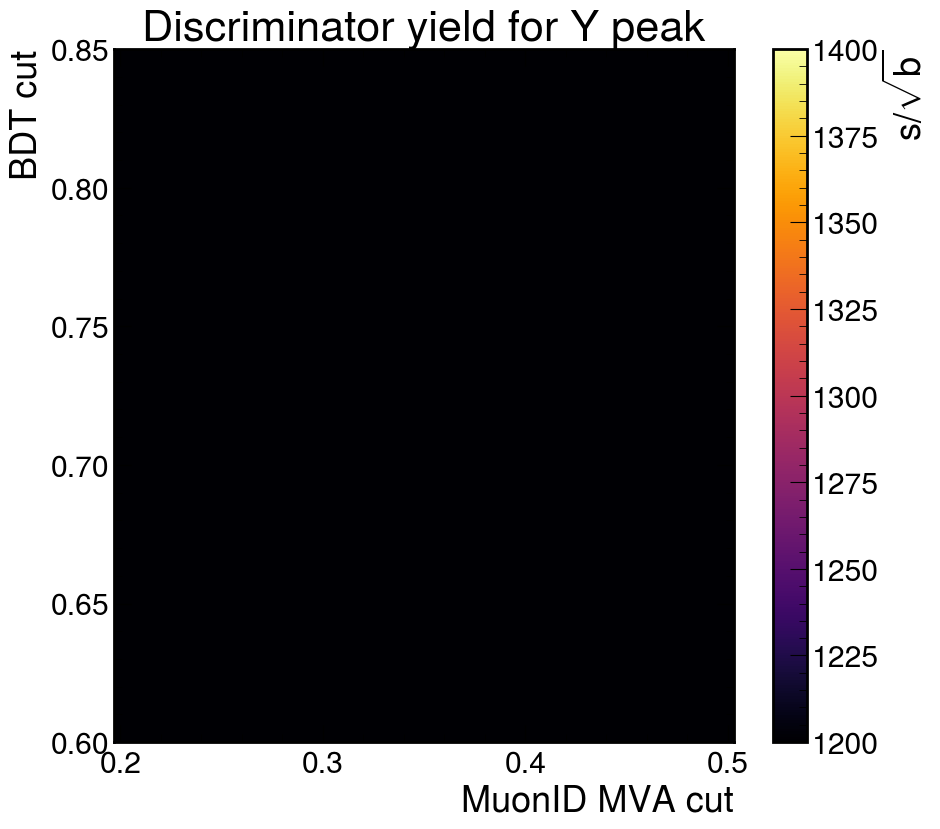

In [ ]:
plt.figure(figsize=(10, 9))
pcm = plt.pcolormesh(XY, YY, effY, shading='auto', cmap='inferno',vmin=1200,vmax=1400)# norm=matplotlib.colors.LogNorm()
colorbar = plt.colorbar(pcm, label='$s/\sqrt{b}$')
# colorbar_ticks = [1000,1300 , 2000]  # Define your desired tick positions
# colorbar.set_ticks(colorbar_ticks)
plt.xlabel('MuonID MVA cut')
plt.ylabel('BDT cut')
plt.title('Discriminator yield for Y peak')
plt.ylim(0.6,0.85)
plt.show()

In [ ]:
id1Jpsi=Y_forest_on_Jpsi_corr.trainData["Muon_softMva1"]
id2Jpsi=Y_forest_on_Jpsi_corr.trainData["Muon_softMva2"]
sig_cut = Y_forest_on_Jpsi_corr.trainData["Score"]==1
bkg_cut = Y_forest_on_Jpsi_corr.trainData["Score"]==0

def efficiencyJpsi(id_lim,dis_lim):
    sig = (predJpsi[sig_cut] > dis_lim) & (id1Jpsi[sig_cut] > id_lim) & (id2Jpsi[sig_cut] > id_lim)
    s = np.sum(Y_forest_on_Jpsi_corr.trainData["weights_prompt"][sig_cut][sig])
    bkg = (predJpsi[bkg_cut] > dis_lim) & (id1Jpsi[bkg_cut] > id_lim) & (id2Jpsi[bkg_cut] > id_lim)
    b = np.sum(bkg)
    return s/np.sqrt(b) if b!= 0 else 0
# print(Y_forest_on_Jpsi_corr.trainData["weights_prompt"][sig_cut])
# print(efficiencyJpsi(-2,-1))

In [ ]:
id_vals = np.linspace(0.2,0.5,50)
vtx_vals= np.linspace(0.2,0.8,50)
XY, YY = np.meshgrid(id_vals,vtx_vals)
effJpsi = np.vectorize(efficiencyJpsi)(XY,YY)
idxJpsi = np.unravel_index(np.argmax(effJpsi),effJpsi.shape)
print("Optimal discriminator cuts on Jpsi: \n SoftMVA (Muon ID): ", XY[idxJpsi], "\n BDT (Vertex quantities): ", YY[idxJpsi])

Optimal discriminator cuts on Jpsi: 
 SoftMVA (Muon ID):  0.37142857142857144 
 BDT (Vertex quantities):  0.46938775510204084


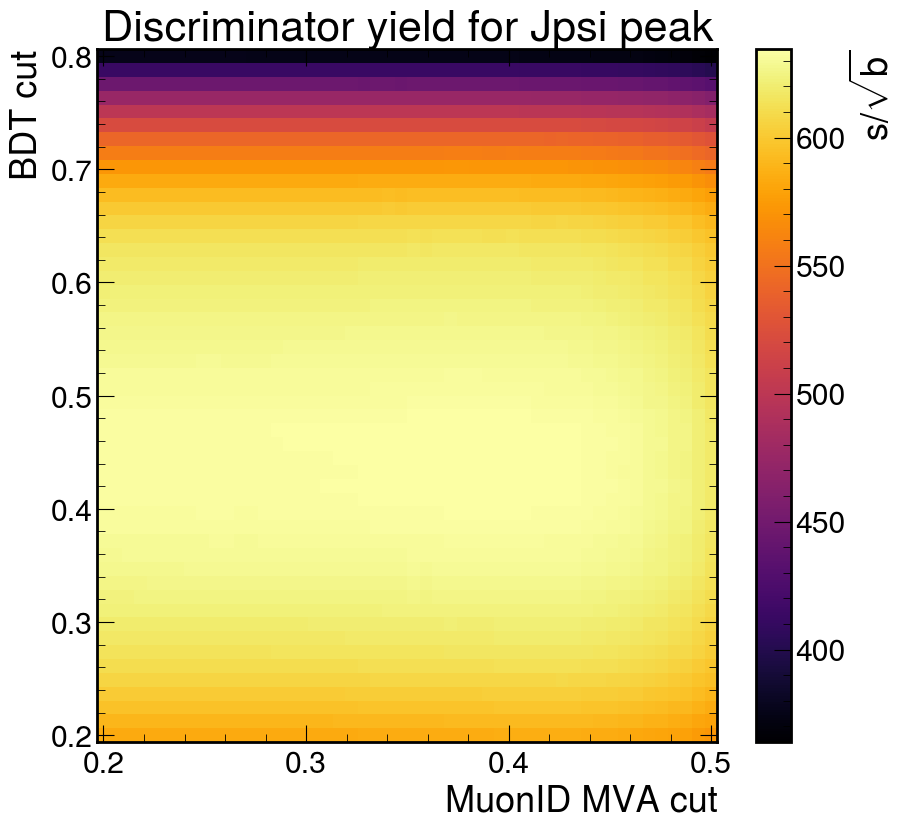

In [ ]:
plt.figure(figsize=(10, 9))
pcm = plt.pcolormesh(XY, YY, effJpsi, shading='auto', cmap='inferno')# norm=matplotlib.colors.LogNorm()
colorbar = plt.colorbar(pcm, label='$s/\sqrt{b}$')
# colorbar_ticks = [1000,1300 , 2000]  # Define your desired tick positions
# colorbar.set_ticks(colorbar_ticks)
plt.xlabel('MuonID MVA cut')
plt.ylabel('BDT cut')
plt.title('Discriminator yield for Jpsi peak')
# plt.ylim(0.6,0.85)
plt.show()

Here study working point of Jpsi trained forest

In [ ]:
predY = Jpsi_forest_on_Y_prompt.bst.predict(xgb.DMatrix(Jpsi_forest_on_Y_prompt.trainData_skinny))
predJpsi = Jpsi_fp.bst.predict(xgb.DMatrix(Jpsi_fp.trainData_skinny))

In [ ]:
#Study cuts on discriminators to optimize for Y

id1Y=Jpsi_forest_on_Y_prompt.trainData["Muon_softMva1"]
id2Y=Jpsi_forest_on_Y_prompt.trainData["Muon_softMva2"]
sig_cut = Jpsi_forest_on_Y_prompt.trainData["Score"]==1
bkg_cut = Jpsi_forest_on_Y_prompt.trainData["Score"]==0

def efficiencyY(id_lim,dis_lim):
    sig = (predY[sig_cut] > dis_lim) & (id1Y[sig_cut] > id_lim) & (id2Y[sig_cut] > id_lim)
    s = np.sum(sig)
    bkg = (predY[bkg_cut] > dis_lim) & (id1Y[bkg_cut] > id_lim) & (id2Y[bkg_cut] > id_lim)
    b = np.sum(bkg)
    return s/np.sqrt(b) if b!= 0 else 0

In [ ]:
id_vals = np.linspace(0.2,0.5,50)
vtx_vals= np.linspace(0.9,0.99,100)
XY, YY = np.meshgrid(id_vals,vtx_vals)
effY = np.vectorize(efficiencyY)(XY,YY)
idxY = np.unravel_index(np.argmax(effY),effY.shape)
print("Optimal discriminator cuts: \n SoftMVA (Muon ID): ", XY[idxY], "\n BDT (Vertex quantities): ", YY[idxY])

Optimal discriminator cuts: 
 SoftMVA (Muon ID):  0.45102040816326533 
 BDT (Vertex quantities):  0.9


In [ ]:
id_lim = 0.45
dis_lim = 0.94
sig = (predY[sig_cut] > dis_lim)
e = np.sum(sig)/len(sig)
print(e)

0.2993658980062095


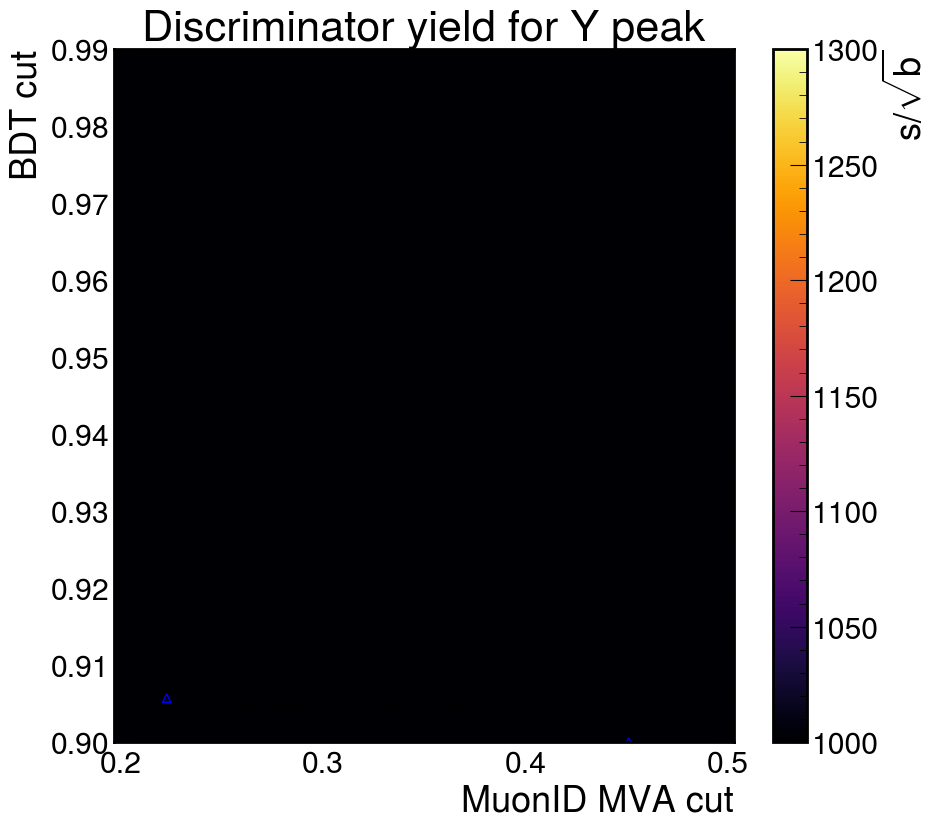

In [ ]:
plt.figure(figsize=(10, 9))
pcm = plt.pcolormesh(XY, YY, effY, shading='auto', cmap='inferno',vmin=1000,vmax=1300)# norm=matplotlib.colors.LogNorm()
plt.scatter( XY[idxY], YY[idxY],marker = '^', edgecolors='blue', facecolors='none', label="Histogram maximum")
plt.legend(loc='lower left',    frameon=True, edgecolor='black', facecolor='none',)
colorbar = plt.colorbar(pcm, label='$s/\sqrt{b}$')
# colorbar_ticks = [1000,1300 , 2000]  # Define your desired tick positions
# colorbar.set_ticks(colorbar_ticks)
plt.xlabel('MuonID MVA cut')
plt.ylabel('BDT cut')
plt.title('Discriminator yield for Y peak')
plt.ylim(0.9,0.99)
plt.show()

In [ ]:
id1Jpsi=Jpsi_fp.trainData["Muon_softMva1"]
id2Jpsi=Jpsi_fp.trainData["Muon_softMva2"]
sig_cut = Jpsi_fp.trainData["Score"]==1
bkg_cut = Jpsi_fp.trainData["Score"]==0

def efficiencyJpsi(id_lim,dis_lim):
    sig = (predJpsi[sig_cut] > dis_lim) & (id1Jpsi[sig_cut] > id_lim) & (id2Jpsi[sig_cut] > id_lim)
    s = np.sum(Jpsi_fp.trainData["weights_prompt"][sig_cut][sig])
    bkg = (predJpsi[bkg_cut] > dis_lim) & (id1Jpsi[bkg_cut] > id_lim) & (id2Jpsi[bkg_cut] > id_lim)
    b = np.sum(bkg)
    return s/np.sqrt(b) if b!= 0 else 0


In [ ]:
id_vals = np.linspace(0.2,0.5,50)
vtx_vals= np.linspace(0.9,0.99,100)
XY, YY = np.meshgrid(id_vals,vtx_vals)
effY = np.vectorize(efficiencyJpsi)(XY,YY)
idxY = np.unravel_index(np.argmax(effY),effY.shape)
print("Optimal discriminator cuts: \n SoftMVA (Muon ID): ", XY[idxY], "\n BDT (Vertex quantities): ", YY[idxY])

Optimal discriminator cuts: 
 SoftMVA (Muon ID):  0.37142857142857144 
 BDT (Vertex quantities):  0.9


In [ ]:
id_lim = 0.45
dis_lim = 0.94
sig = (predJpsi[sig_cut] > dis_lim) & (id1Jpsi[sig_cut] > id_lim) & (id2Jpsi[sig_cut] > id_lim)
e = np.sum(sig)/len(sig)
print(e)

0.10437863814339066


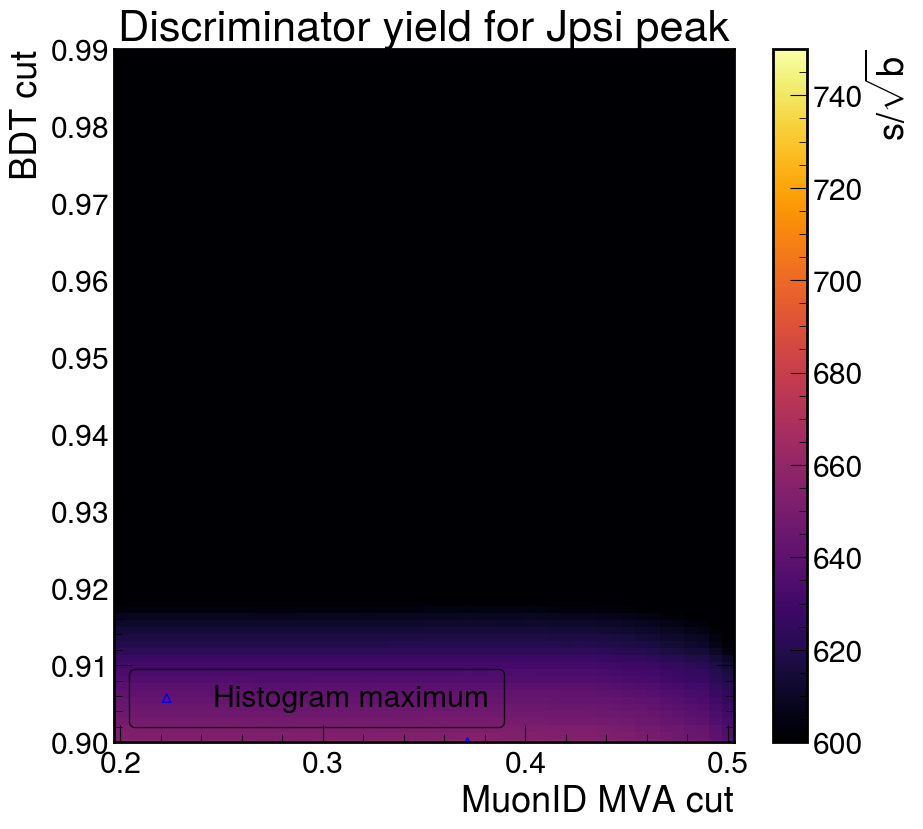

In [ ]:
plt.figure(figsize=(10, 9))
pcm = plt.pcolormesh(XY, YY, effY, shading='auto', cmap='inferno',vmin=600,vmax=750)# norm=matplotlib.colors.LogNorm()
plt.scatter( XY[idxY], YY[idxY],marker = '^', edgecolors='blue', facecolors='none', label="Histogram maximum")
plt.legend(loc='lower left',    frameon=True, edgecolor='black', facecolor='none',)
colorbar = plt.colorbar(pcm, label='$s/\sqrt{b}$')
# colorbar_ticks = [1000,1300 , 2000]  # Define your desired tick positions
# colorbar.set_ticks(colorbar_ticks)
plt.xlabel('MuonID MVA cut')
plt.ylabel('BDT cut')
plt.title('Discriminator yield for Jpsi peak')
plt.ylim(0.9,0.99)
plt.show()